In [12]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import re
import pandas as pd

import csv
comp_relations = []
with open("/content/drive/MyDrive/FinTech/data/relationsUnique.txt") as f:
 lines = csv.reader(f,  delimiter=' ')
 count = 1
 for line in lines:
   c = "C" + str(count)
   comp_relations.append([c,line[2],line[5]])
   count = count + 1

#unique "P"s
ps = []
for i in comp_relations:
  ps.append(i[1])
  ps.append(i[2])

#relationa list exapand
new_relations = ['P279', 'P527','P1535','P910','P366','P1269','P176', 'P155','P156','P516','P1552', 'P7163', 'P414']
print(len(ps))
print(len(ps+new_relations))
pUnique = pd.unique(ps + new_relations)
print(len(pUnique))
#for each entity, get the edges with different relations
relations_list = pUnique
companyCategories = ['business', 'bank', 'investment bank', 'credit institution', 'supermarket chain', 'retail chain']
#another way: regex to match key words

# def isCompany(code, companyCategories):
#   site = requests.get('https://www.wikidata.org/wiki/' + code)
#   soup = BeautifulSoup(site.text, 'lxml')
#   target = soup.find('div', id='P31')
#   if target == None: #not find the "instance of" block
#     return False
#   else:
#     category_list = target.find('div', class_ = 'wikibase-statementlistview-listview')
#     category_block_set = category_list.find_all('div', class_ = 'wikibase-statementview-mainsnak-container')
#     for item in category_block_set:
#       title_block = item.find('div', class_ = 'wikibase-snakview-value wikibase-snakview-variation-valuesnak')
#       category = title_block.find('a').text
#       if (category in companyCategories)|(re.search("business|manufacture|group|comercial|(company|firm|institutions*)$", category)!=None):
#         return True
#       else:
#         return False

def find_relations(wiki_link, u_name, black_tree_root):
  u = [wiki_link, u_name, True]
  site = requests.get('https://www.wikidata.org/wiki/' + wiki_link)
  soup = BeautifulSoup(site.text, 'lxml')
  #get all types of relations i need
  relations_needed = relations_list
  relations_set_for_u = []
  #被u指向的对象
  appended_company_set = []
  appended_noncompany_set = []

  for relation in relations_needed:
    target = soup.find('div', id=relation)

    if(target != None):
      ps_list = target.find('div', class_ = 'wikibase-statementlistview-listview')
      v_block_set = ps_list.find_all('div', class_ = 'wikibase-statementview-mainsnak-container')

      for v_block in v_block_set:
        try:
          title_block = v_block.find('div', class_ = 'wikibase-snakview-value wikibase-snakview-variation-valuesnak')
          v_complete = title_block.find('a')
          v_code = v_complete['href'][6:]
          v_name = v_complete.text
          # v_isCompany = isCompany(v_code, companyCategories)
          v_isCompany = True
          v = [v_code, v_name, v_isCompany]

          if int(v_code[1:]) < 100000000:
            # insert(black_tree_root, v, [u, v, relation]) #enity built in the __init__ of middle object if it is new in the BST

            if v_isCompany == True:
              if v not in appended_company_set:
                appended_company_set.append(v)
            else:
              if v not in appended_noncompany_set:
                appended_noncompany_set.append(v)

            relations_set_for_u.append([u,v,relation])
        except:
          continue

  return relations_set_for_u, appended_company_set #, appended_noncompany_set

#BST class as a list of middles
class middle:
  def __init__(self, entity): #[code, name, iscompany] is a standard form of entity, stored with an []
    self.data = entity
    self.left = None
    self.right = None
    self.first_order_set = {'P31': [],
                            'P366': [],
                            'P452': [],
                            'P1056': [],
                            'P112': [],
                            'P127': [],
                            'P169': [],
                            'P113': [],
                            'P114': [],
                            'P121': [],
                            'P355': [],
                            'P749': [],
                            'P1830': [],
                            'P3320': [],
                            'P155': [],
                            'P166': [],
                            'P199': [],
                            'P306': [],
                            'P361': [],
                            'P400': [],
                            'P2770': [],
                            'P463': [],
                            'P1344': []}
def insert(root, newEntity, relation): #relation is defined as [u, v, p]
  #only when this is a new entity, a middle node will be built, then update the u in the r set
  if root is None:
    root = middle(newEntity)
    root.first_order_set[relation[2]].append(relation[0])
    return root

  newEntityCode = float(newEntity[0][1:])
  rootEntityCode = float(root.data[0][1:])
  if newEntityCode < rootEntityCode:
    root.left = insert(root.left, newEntity, relation)
  elif newEntityCode > rootEntityCode:
    root.right = insert(root.right, newEntity, relation)
  #if this entity is existing, then update the u in the relation set
  else:
    root.first_order_set[relation[2]].append(relation[0])
  return root

# root = insert(None, ["Q1", "MS", True])
# insert(root, ['Q100', "KK", True])
# root.right.data[1]

104
117
34


Init list prep for search

In [ ]:
#original search list check
LiMarket = [['Q478214','Tesla Inc'],['Q29921278','Nio'],['Q55931','Hyundai Motor Company'],['Q3511885','T-Mobile US'],['Q98139925','Li Auto'],
            ['Q20165','Nissan'],['Q81965','General Motors'],['Q44294','Ford Motor Company'],['Q63035278','XPeng'],['Q7338847','Rivian Automotive'],['Q127074','Albemarle Corporation'],['Q10954805','Ganfeng Lithium'],['Q55635834','Tianqi Lithium'],['Q1637468','Orocobre'],
            ['Q3067064','Sociedad Química y Minera de Chile'],['Q108541568','Mineral Resources'],['Q113279646','Livent Corporation'],['Q109464416','LG Energy Solution'],['Q53247','Panasonic Corporation'],['Q16172809','SK Innovation'],['Q21120876','Samsung SDI'],['Q18653563','Contemporary Amperex Technology Co. Limited'],['Q121032877','CBAK technology Inc'],
            ['Q53238','Hitachi'],['Q67932360','Gotion High-tech Co'],['Q121033020','Sunwoda Electronic'],['Q121033088','Standard Lithium Ltd'],['Q106238481','Piedmont Lithium'],['Q6647933','Lithium Corporation of America'],['Q21031539','Galaxy Resources'],['Q1341588','EnerSys'],['Q109627145','VULCAN ENERGY RESOURCES LIMITED'],
            ['Q486976','LG Chem'],['Q105966435','EVE Energy Co']
]

In [ ]:
#start the search with a company_list
import queue as q

black_set = [None]*150000000
search_list =q.Queue()
init_comp = LiMarket

for item in init_comp:
  #black_set[int(item[0][1:])] = True
  print(item)
  search_list.put(item)
print(search_list.qsize())

Search

In [ ]:
complete_relations_list = []
black_tree_root = insert(None, ["Q500000.5", "root", False], ['root', 'root', 'P31'])

count = 0 #total num of found companies, no matter has been found or not
deltaNew = 0 #within 5k, the num of found companies not in balck set
numThisBatch = 0 #accumulate to 5k

while (search_list.empty() == False):
  #pop head comp, rely on linked list, not array
  comp = search_list.get()

  if count%1000 <=100 and numThisBatch >= 1000: #when count is at around 5k
    deltaNewProp = deltaNew/numThisBatch
    print("--------------------------------------------------")
    print(str(count))
    print(str(deltaNewProp))
    print(str(search_list.qsize()))
    print(str(numThisBatch))
    print("--------------------------------------------------")

    if count%10000 <= 100: #when to save the current relations
      pd.DataFrame(complete_relations_list).to_csv("/content/drive/MyDrive/FinTech/Li/Search/complete_relations_list_" + str(count) + ".csv", sep=',',index=False)
      pd.DataFrame(black_set).to_csv("/content/drive/MyDrive/FinTech/Li/Search/black_set_" + str(count) + ".csv", sep=',',index=False)
      try:
        pd.DataFrame(list(search_list.queue)).to_csv("/content/drive/MyDrive/FinTech/Li/Search/search_list_" + str(count) + ".csv", sep=',',index=False)
      except:
        print("Fail to convert search_list to df")

    if deltaNewProp < 0.03: #when to stop
      print("Search Completed")
      pd.DataFrame(complete_relations_list).to_csv("/content/drive/MyDrive/FinTech/Li/Search/complete_relations_list_" + str(count) + ".csv", sep=',',index=False)
      pd.DataFrame(black_set).to_csv("/content/drive/MyDrive/FinTech/Li/Search/black_set_" + str(count) + ".csv", sep=',',index=False)
      try:
        pd.DataFrame(list(search_list.queue)).to_csv("/content/drive/MyDrive/FinTech/Li/Search/search_list_" + str(count) + ".csv", sep=',',index=False)
      except:
        print("Fail to convert search_list to df")
      break #end the search

    else:
      deltaNew = 0
      numThisBatch = 0

  try:
    if int(comp[0][1:]) <= 150000000:
      if black_set[int(comp[0][1:])] == None:
        # print('look for: ' + comp[1])
        relations, found_companies = find_relations(comp[0], comp[1], black_tree_root)
        black_set[int(comp[0][1:])] = True

        # print("-----<< " + comp[0] + " " + comp[1])
        # print("size of the found relations is:" + str(len(relations)), "size of related companies for this compy is:" + str(len(found_companies)))
        complete_relations_list = complete_relations_list + relations
        for found_company in found_companies:
          if black_set[int(found_company[0][1:])] != True:##
            search_list.put(found_company[0:2])
            deltaNew += 1
          count += 1
          numThisBatch += 1
        # print("newCompysThisSearch: " + str(newCompysThisSearch))
        # print("Length search List right now: " + str(search_list.qsize()))
    else:
      print("company Qcode out of range")
  except:
    print("some problem in searching a company" + comp[0] + " " + comp[1])

##Graph Build

Node List

In [5]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import re
import pandas as pd
import csv

#look for the stock code of searched companies
#given: relation list
#want to build a node list and a edge list, some companies in the node list have stock infos as an attribute, thats the ori X we want

def loadRelationCSVFile(csv): #形如 "['Q107427750', 'AAI CORP', True]","['Q482994', 'album', True]",P31
    values = pd.read_csv(csv).values.tolist()
    out = []
    for value in values:
        r = convertStringToCompList(value)
        c1 = r[0]
        c2 = r[1]
        p = r[2]
        out.append([c1, c2, p])
    return out
def convertStringToCompList(relation):
    rInfo = []
    for txt in relation[0:2]:
        temp = []
        for i in range(0, len(txt)):
            if txt[i] == '[':
                for j in range(i+1, len(txt)):
                    if txt[j] == ']':
                        temp.append([i.replace("'", "") for i in txt[i+2:j].split(', ')])
                        break
            else:
                continue
        rInfo.append(temp[0])
    rInfo.append(relation[2])
    return rInfo

wiki_relations = loadRelationCSVFile('/content/complete_relations_list_10051.csv')
#step 1: unique complete node name with the QCode
wiki_df = pd.DataFrame(wiki_relations,columns=['A','B','Relation'])
print(pd.concat([wiki_df['A'], wiki_df['B']],axis=0))
#compsUnique = np.unique(pd.concat([wiki_df['A'], wiki_df['B']],axis=0)).tolist() #have to use tolist()
compsUnique = np.unique(wiki_df.iloc[:,0:2]).tolist()
len(compsUnique)

0                               [Q478214, Tesla Inc, True]
1                               [Q478214, Tesla Inc, True]
2                               [Q478214, Tesla Inc, True]
3                               [Q478214, Tesla Inc, True]
4                               [Q478214, Tesla Inc, True]
                               ...                        
10598                               [Q11379, energy, True]
10599                    [Q205805, conservation law, True]
10600                        [Q214070, physical law, True]
10601                               [Q11379, energy, True]
10602    [Q6211811, Category:Conservation of energy, True]
Length: 21206, dtype: object


5697

In [6]:
#step 2: check which has P414 and build a stock_comp_list
stock_comp = []
for r in range(0,len(wiki_df)):
  if wiki_df['Relation'][r] == 'P414':
    stock_comp.append(wiki_df['A'][r])
stock_comp = np.unique(stock_comp).tolist()
print(stock_comp)
non_stock_comp = [x for x in compsUnique if x not in stock_comp]
print(non_stock_comp)

[['Q1046951', 'Target Corporation', 'True'], ['Q105966435', 'EVE Energy Co', 'True'], ['Q106238481', 'Piedmont Lithium', 'True'], ['Q1065539', 'Jiangling Motors', 'True'], ['Q1069924', 'Zipcar', 'True'], ['Q108541568', 'Mineral Resources', 'True'], ['Q109464416', 'LG Energy Solution', 'True'], ['Q10954805', 'Ganfeng Lithium', 'True'], ['Q109627145', 'VULCAN ENERGY RESOURCES LIMITED', 'True'], ['Q11104175', 'Dongfeng Motor Group Company Limited', 'True'], ['Q1113804', 'Comcast', 'True'], ['Q113279646', 'Livent Corporation', 'True'], ['Q11463', 'Adobe', 'True'], ['Q1146428', 'Yahoo! Japan', 'True'], ['Q11507487', 'Japan Exchange Group', 'True'], ['Q1157624', 'Daimler Truck', 'True'], ['Q121032877', 'CBAK technology Inc', 'True'], ['Q121033020', 'Sunwoda Electronic', 'True'], ['Q121033088', 'Standard Lithium Ltd', 'True'], ['Q127074', 'Albemarle Corporation', 'True'], ['Q1306571', 'Koç Holding', 'True'], ['Q1327429', 'Fincantieri', 'True'], ['Q1341588', 'EnerSys', 'True'], ['Q1359568', 'A

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [7]:
#step 3: for loop to look at their stock tickers while build the complete node_list
def stockTic(comp): #[QCode, name, True]
  site = requests.get('https://www.wikidata.org/wiki/' + comp[0])
  soup = BeautifulSoup(site.text, 'lxml')
  #get P414
  target = soup.find('div', id='P414')
  if(target != None):
    ps_list = target.find('div', class_ = 'wikibase-statementlistview-listview')
    v_block_set = ps_list.find_all('div', class_ = 'wikibase-statementview-mainsnak-container')
    tics = []
    try:
      for v_block in v_block_set:
        qualifiers = v_block.find_all('div',class_='wikibase-snaklistview')
        for qualifier in qualifiers:
          if qualifier.find('a').text == 'ticker symbol':
            exch = v_block.find('div',class_='wikibase-statementview-mainsnak').find('a').text
            tic = qualifier.find('div', class_='wikibase-snakview-value wikibase-snakview-variation-valuesnak').text
            tics.append((exch, tic))
    except:
      print("unexpected struc at 'stock exchange' statement")
  return tics

#given a stock comp list
def buildNodeList(stock_comps, non_stock_comps):
  node_list = []
  idx = 0
  for sc in stock_comps: #sc is ['Q','name', True]
    QCode = sc[0]
    name = sc[1]
    tics = stockTic(sc)
    node_list.append([idx, QCode, name, tics])
    idx += 1
  for nc in non_stock_comps:
    QCode = nc[0]
    name = nc[1]
    node_list.append([idx, QCode, name, None])
    idx += 1
  return node_list

node_list = buildNodeList(stock_comp,non_stock_comp)

In [8]:
#check my node_list
node_list[:10]

[[0, 'Q1046951', 'Target Corporation', [('New York Stock Exchange', 'TGT')]],
 [1, 'Q105966435', 'EVE Energy Co', [('Shenzhen Stock Exchange', '300014')]],
 [2, 'Q106238481', 'Piedmont Lithium', [('Australian Stock Exchange', 'PLL')]],
 [3, 'Q1065539', 'Jiangling Motors', [('Shenzhen Stock Exchange', '000550')]],
 [4, 'Q1069924', 'Zipcar', [('Nasdaq', 'ZIP')]],
 [5,
  'Q108541568',
  'Mineral Resources',
  [('Australian Stock Exchange', 'MIN')]],
 [6,
  'Q109464416',
  'LG Energy Solution',
  [('Korean Stock Exchange', '373220')]],
 [7,
  'Q10954805',
  'Ganfeng Lithium',
  [('Shenzhen Stock Exchange', '002460'),
   ('Hong Kong Exchanges And Clearing Ltd', '1172')]],
 [8,
  'Q109627145',
  'VULCAN ENERGY RESOURCES LIMITED',
  [('Australian Stock Exchange', 'VUL'), ('Frankfurt Stock Exchange', 'VUL')]],
 [9,
  'Q11104175',
  'Dongfeng Motor Group Company Limited',
  [('Hong Kong Exchanges And Clearing Ltd', '0489')]]]

Edge List

In [9]:
def node_dict_map(node_list): #{QCOde : index}
  dic = {}
  for node in node_list:
    dic[node[1]] = node[0]
  return dic

def buildEdgeList(node_list, relations):
  node_dict = node_dict_map(node_list)
  edges = []
  count = 0
  for r in relations:
    if count%10000==0: print(count)
    edgeId = count
    start = r[0][0]
    end = r[1][0]
    P = r[2]
    startId = node_dict[start]
    endId = node_dict[end]
    edges.append([edgeId, startId, endId, P])
    count += 1
  return edges

edge_list = buildEdgeList(node_list,wiki_relations)

0
10000


In [10]:
edge_list[:100]

[[0, 3468, 4988, 'P31'],
 [1, 3468, 1253, 'P31'],
 [2, 3468, 4513, 'P31'],
 [3, 3468, 3495, 'P31'],
 [4, 3468, 3306, 'P31'],
 [5, 3468, 5411, 'P31'],
 [6, 3468, 1619, 'P452'],
 [7, 3468, 1111, 'P452'],
 [8, 3468, 5689, 'P452'],
 [9, 3468, 1928, 'P1056'],
 [10, 3468, 2139, 'P1056'],
 [11, 3468, 1187, 'P1056'],
 [12, 3468, 920, 'P1056'],
 [13, 3468, 1766, 'P1056'],
 [14, 3468, 3199, 'P1056'],
 [15, 3468, 3279, 'P1056'],
 [16, 3468, 4212, 'P1056'],
 [17, 3468, 3975, 'P1056'],
 [18, 3468, 4214, 'P1056'],
 [19, 3468, 1331, 'P1056'],
 [20, 3468, 5271, 'P1056'],
 [21, 3468, 1703, 'P1056'],
 [22, 3468, 2555, 'P1056'],
 [23, 3468, 2435, 'P1056'],
 [24, 3468, 4927, 'P1056'],
 [25, 3468, 1624, 'P112'],
 [26, 3468, 1604, 'P112'],
 [27, 3468, 2810, 'P127'],
 [28, 3468, 842, 'P127'],
 [29, 3468, 3514, 'P127'],
 [30, 3468, 79, 'P127'],
 [31, 3468, 2810, 'P127'],
 [32, 3468, 842, 'P127'],
 [33, 3468, 79, 'P127'],
 [34, 3468, 533, 'P127'],
 [35, 3468, 2810, 'P127'],
 [36, 3468, 3514, 'P127'],
 [37, 346

graph build

In [13]:
def buildGraph(node_list, edge_list, P_list):
  #p's mapping to its index
  P_dict = {}
  for p_idx in range(0,len(P_list)):
    P_dict[P_list[p_idx]] = p_idx

  #Adj matrix build
  N = len(node_list)
  K = len(P_list)
  adj = np.zeros((N,N,K))
  for edge in edge_list:
    A_idx = edge[1]
    B_idx = edge[2]
    p = edge[3]
    p_idx = P_dict[p]
    adj[A_idx][B_idx][p_idx] = 1
  return adj
adj = buildGraph(node_list, edge_list, pUnique)

###Graph Evaluation

In [14]:
#fully connected or not
def adj_simplify(adj):
  return np.where(np.sum(adj, axis=2) >= 1, 1, 0) #aixs=2, sum up the lowest level array
adj_simple = adj_simplify(adj)

In [15]:
#graph evaluation
#how many have stocks
print(len(stock_comp))
#how's connectivity? density?
print("Pair-wise Graph density:", 2*np.count_nonzero(adj_simple)/(len(adj_simple)*(len(adj_simple)-1)))
print("Avg degree:", 2*np.count_nonzero(adj_simple)/len(adj_simple))
#验证A B之间的关系可以同时有不止一种，比如TESLA跟Martin的关系
# for i in range(0, len(adj)):
#   if  np.count_nonzero(adj[3468][i]) >= 2:
#     print(adj[3468][i], node_list[3468], node_list[i])

137
Pair-wise Graph density: 0.000619473979011228
Avg degree: 3.528523784447955


In [16]:
def is_fully_connected(graph):
    """
    Returns True if the given directed graph is fully connected, False otherwise.
    """
    # Perform depth-first search from each node in the graph
    for node in range(graph.shape[0]):
        visited = set()
        stack = [node]
        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                neighbors = np.where(graph[current,:] > 0)[0]
                stack.extend(neighbors)
        # If any node is not reachable from the current node, graph is not fully connected
        if len(visited) != graph.shape[0]:
            return False
    # If all nodes are reachable from each node, graph is fully connected
    return True
is_fully_connected(adj_simple)

False

##Graph aggregation intro

In [ ]:
#play with adj matrix
import numpy as np

# Define the adjacency matrix (0 indicates no edge, 1 indicates an edge)
adjacency_matrix = np.array([[0, 1, 1, 0, 0],
                             [1, 0, 1, 1, 0],
                             [1, 1, 0, 1, 0],
                             [0, 1, 1, 0, 1],
                             [0, 0, 0, 1, 0]])

# Define initial node features
num_nodes = adjacency_matrix.shape[0]
feature_dim = 3
initial_features = np.random.rand(num_nodes, feature_dim)

# Implement the aggregation method
def aggregate_message(u, v, features): #v is the orig node
    degree_v = np.sum(adjacency_matrix[v])  # Degree of node u
    message = (1 / (degree_v + 1)) * features[u]
    return message

def aggregate_neighbors(node, features):
    aggregated_message = np.zeros((feature_dim,))
    nbs = np.nonzero(adjacency_matrix[node])[0]
    for neighbor in nbs:
        aggregated_message += aggregate_message(neighbor, node, features)
    return aggregated_message

# Apply the aggregation method to update node features for many times I want.
def update(init_features, times):
  updated_features = np.copy(init_features)
  for i in range(0, times):
    for node in range(num_nodes):
      updated_features[node] += aggregate_neighbors(node, initial_features)
  return updated_features

#update for five times
updated_features = update(initial_features, 5)

# Print the updated node features
for node in range(num_nodes):
    print(f"Node {node} - Original Features: {initial_features[node]}")
    print(f"Node {node} - Updated Features: {updated_features[node]}")
    print()

##Get Familiar with SGN, simple graph network task

In [ ]:

import numpy as np
#use V, X, Y to denote
adj = np.array([[0, 1, 1, 0, 0],
              [1, 0, 1, 1, 0],
              [1, 1, 0, 1, 0],
              [0, 1, 1, 0, 1],
              [0, 0, 0, 1, 0]])
num_nodes = adj.shape[0]
feature_dim = 3
X = np.random.rand(num_nodes, feature_dim)
Y = np.array([0, 1, 0, 1, 0])  # Example binary labels (0 for negative, 1 for positive)
classification_data = []
for node in range(num_nodes):
    classification_data.append((X[node], Y[node]))

def activation(x):
  return 1/(1+np.exp(-x))

w0 = np.random.randn(feature_dim + 1) #[....] + b

def train(input, w, adj, num_epochs, lr):
  for epoch in range(0,num_epochs):
    total_loss = 0
    for x, y in input:
      x_concat = np.concatenate(([1], x)) #[....]

      np.mat(adj,x_concat)
      a = activation(z) #X' = func(AXW) e.g. (1,10)(10,3+1)(4,1) -> (1,1)
      print(a)
      loss = -y*np.log(a) - (1-y)*np.log(1-a) #loss = - yi * log(yi_hat) - (1-yi)*log(1-yi_hat)
      total_loss += loss
      w -= lr*(a-y)*x_concat
    avg_loss = total_loss/len(input)
    # print(epoch, avg_loss)
  return w
train(classification_data, w0, adj, 1000, 0.001)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np

# Define the adjacency matrix (0 indicates no edge, 1 indicates an edge)
adjacency_matrix = np.array([[0, 1, 1, 0, 0],
                             [1, 0, 1, 1, 0],
                             [1, 1, 0, 1, 0],
                             [0, 1, 1, 0, 1],
                             [0, 0, 0, 1, 0]])

# Define initial node features
num_nodes = adjacency_matrix.shape[0]
feature_dim = 3
initial_features = np.random.rand(num_nodes, feature_dim)

# Create binary labels for nodes
labels = np.array([0, 1, 0, 1, 0], dtype=np.float32)

# Convert adjacency matrix to edge indices
edge_indices = np.array(np.nonzero(adjacency_matrix)).T

# Define a simple GCN model
def build_gcn_model(feature_dim, hidden_units):
    x_in = Input(shape=(feature_dim,))
    adj_indices = Input(shape=(None, 2), dtype=tf.int32)

    x = Dense(hidden_units, activation='relu')(x_in)
    x = tf.gather(x, adj_indices[:, 0])  # Gather features for each node
    x = tf.reduce_mean(x, axis=1)  # Aggregate features from neighbors
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[x_in, adj_indices], outputs=x)
    return model

# Build and compile the GCN model
model = build_gcn_model(feature_dim, hidden_units=16)
model.compile(optimizer=Adam(learning_rate=0.01), loss=BinaryCrossentropy())

# Prepare the input data
adj_indices = np.tile(np.arange(num_nodes), (num_nodes, 1))
adj_indices = np.stack((adj_indices, np.transpose(adj_indices)), axis=-1)

input_data = [initial_features, adj_indices]

# Expand labels to match batch size
expanded_labels = np.expand_dims(labels, axis=1)

# Train the model
model.fit(input_data, expanded_labels, epochs=1000, verbose=1)


In [ ]:
#check for the actual GCN example:


##GCN Application, wrap up on tf

In [ ]:
!pip install spektral

import numpy as np
import tensorflow as tf
import spektral

In [ ]:
cora_dataset = spektral.datasets.citation.Citation(name='cora')
test_mask = cora_dataset.mask_te #mask means a list of t or false indicating...
train_mask = cora_dataset.mask_tr
val_mask = cora_dataset.mask_va
graph = cora_dataset.graphs[0]
features = graph.x
adj = graph.a
labels = graph.y

In [ ]:
#epxlore
print(type(adj))
print(adj.todense()) #A
print(np.eye(adj.shape[0])) #identical matrix I
print(features) #already the nd array form
print(labels) #in nd array form

In [ ]:
#reshape and pre-procecssing
features = features.astype('float32')
adj = adj.todense() + np.eye(adj.shape[0]).astype('float32')#A needs to be A + I, for each node, self-correlated
print(adj.shape)
print(features.shape)
print(type(labels), labels.shape)

In [ ]:
#need masked evaluations on the graph
def masked_softmax_cross_entropy(logits, labels, mask):
  loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)
  mask = tf.cast(mask, dtype=tf.float32) #[T F F T T] -> [1. 0. 0. 1. 1.]
  mask /= tf.reduce_mean(mask) #你去除这个mask的平均的效果就是，我们参与的点越少，也就相应的，他们自身的权重也就越大，这可以保证，你的总损失不会因为参与的点少而显得微不足道
  loss *= mask
  return tf.reduce_mean(loss) #mean loss

def masked_accuracy(logits, labels, mask):
  correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
  accuracy_all = tf.cast(correct_prediction, tf.float32)
  mask = tf.cast(mask, dtype = tf.float32)
  mask /= tf.reduce_mean(mask)
  accuracy_all *= mask
  return tf.reduce_mean(accuracy_all)

masked_softmax_cross_entropy([0.3,0.5,0.1,0.9], [0,0,1,1],[True,True,True,False])

In [ ]:
#simple gnn define
#你要知道，我们的GCN的几个要素是什么，无非就是，临街矩阵，X，以及你的节点传播方法和激活函数
#
# def gnn(fts, adj, transform, activation):
#   seq_fts = transform(fts) #apply on each node
#   ret_fts = tf.matmul(adj, seq_fts) #A x X
#   #如果涉及到了基于邻居的传播方式，那么以上的结构就要重新定义了
#   return activation(ret_fts)

In [ ]:
def train(fts, adj, epochs, lr):
  dense = tf.keras.Sequential()
  dense.add(tf.keras.layers.Dense(32))
  dense.add(tf.keras.layers.Dense(32))
  dense.add(tf.keras.layers.Dense(16))
  out = tf.keras.layers.Dense(7)

  def gnn_fn(fts, adj, transform, activation):
    deg = tf.reduce_sum(adj, axis=-1)
    seq_fts = transform(fts) #apply on each node
    ret_fts = tf.matmul(adj/deg, seq_fts) #A x X
    #如果涉及到了基于邻居的传播方式，那么以上的结构就要重新定义了
    return activation(ret_fts)

  def propagate(fts, adj):
    hidden = gnn_fn(fts, adj, dense, tf.nn.relu)
    logits = gnn_fn(hidden, adj, out, tf.identity)
    return logits

  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  best_acc = 0
  for ep in range(0, epochs+1):
    #want to monitor the loss
    with tf.GradientTape() as t:
      logits = propagate(fts, adj)
      loss = masked_softmax_cross_entropy(logits, labels, train_mask)
      print(type(logits))

    variables = t.watched_variables()
    grads = t.gradient(loss, variables)
    optimizer.apply_gradients(zip(grads, variables)) #optimizer to update for once

    logits = propagate(fts, adj)
    val_acc = masked_accuracy(logits, labels, val_mask)
    test_acc = masked_accuracy(logits, labels, test_mask)

    if val_acc > best_acc:
      best_acc = val_acc
      print('Epoch',ep,'| Train loss:', loss.numpy(), '| Val acc:', val_acc.numpy(),
      '| Test acc:', test_acc.numpy())



In [ ]:
train(features, adj, 200, 0.01)

In [ ]:
#lets check
def is_fully_connected(graph):
    """
    Returns True if the given directed graph is fully connected, False otherwise.
    """
    # Perform depth-first search from each node in the graph
    for node in range(graph.shape[0]):
        visited = set()
        stack = [node]
        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                neighbors = np.where(graph[current,:] > 0)[0]
                stack.extend(neighbors)
        # If any node is not reachable from the current node, graph is not fully connected
        if len(visited) != graph.shape[0]:
            return False
    # If all nodes are reachable from each node, graph is fully connected
    return True
is_fully_connected()

#GNN on the homo graph of our data


In [17]:
#API method test
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

In [18]:
unique_exchangers = {}
unique_exchangers['New York Stock Exchange'] = 'US'
unique_exchangers['Nasdaq'] = 'US'
unique_exchangers['London Stock Exchange'] = 'LSE'
unique_exchangers['Australian Stock Exchange'] = 'AU'
unique_exchangers['Boerse Frankfurt - Regulierter Markt'] = 'F'
unique_exchangers['Euronext Paris'] = 'PA'
unique_exchangers['Tokyo Stock Exchange'] = 'TSE'
unique_exchangers['Korean Stock Exchange'] = 'KO'
unique_exchangers['Shenzhen Stock Exchange'] = 'SHE'
unique_exchangers['Hong Kong Exchanges And Clearing Ltd'] = 'HK'

def code_maker(name, id):
  abb = unique_exchangers[name]
  full = id + '.' + abb
  # print(full)
  return full
code_maker('Hong Kong Exchanges And Clearing Ltd', '0489')

def find_stocks_from_node_list(node_list): #append the features to the orig node_list, for convenience
  for node in node_list:
    if node[3] != None:
      try:
        code = code_maker(node[3][-1][0], node[3][-1][1])
      except:
        code = None

      if code != None:
        api_token = "64adc5dfd3fa92.57128976"
        dataframes = {}
        stock = code
        url = f"https://eodhistoricaldata.com/api/eod/{stock}?from=2005-01-01&to=2022-12-31&period=d&api_token={api_token}"

        response = requests.get(url)
        if response.status_code == 200:
          print("request suc")
          try:
            csv_data = io.StringIO(response.text)
            df = pd.read_csv(csv_data)

            # 仅为非 "Date" 列添加后缀
            # df = df.rename(columns=lambda col_name: col_name if col_name == 'Date' else col_name + '_' + stock)

            # 将 DataFrame 存储在字典中，使用股票代码作为键
            dataframes[stock] = df

            all_dates = pd.concat([df['Date'] for df in dataframes.values()]).drop_duplicates().sort_values().reset_index(drop=True)
            all_dates_df = pd.DataFrame({'Date': all_dates})
            df_stock = all_dates_df
            for stock, df in dataframes.items():
                df_stock = df_stock.merge(df, on='Date', how='left')

            #to numeric
            for col in df_stock.columns:
                df_stock[col] = pd.to_numeric(df_stock[col], errors='coerce')

            #append df
            node.append(df)
          except:
            print('data format issue')

        else:
            print(f"Error: API request for {stock} failed with status code {response.status_code}")

  return node_list

In [19]:
find_stocks_from_node_list(node_list)

request suc
request suc
request suc
request suc
request suc
request suc
request suc
Error: API request for 1172.HK failed with status code 404
Error: API request for 0489.HK failed with status code 404
request suc
request suc
Error: API request for ABS.LSE failed with status code 404
Error: API request for 4689.TSE failed with status code 404
Error: API request for 8697.TSE failed with status code 404
request suc
request suc
request suc
request suc
request suc
Error: API request for 9988.HK failed with status code 404
request suc
request suc
request suc
request suc
request suc
request suc
request suc
request suc
request suc
request suc
Error: API request for 4333.HK failed with status code 404
request suc
request suc
request suc
Error: API request for 8634.TSE failed with status code 404
request suc
request suc
request suc
Error: API request for 9984.TSE failed with status code 404
Error: API request for OTE.US failed with status code 404
request suc
request suc
request suc
request suc

[[0,
  'Q1046951',
  'Target Corporation',
  [('New York Stock Exchange', 'TGT')],
              Date    Open     High       Low   Close  Adjusted_close    Volume
  0     2005-01-03   52.67   53.150   51.5200   51.80         34.2913   4434100
  1     2005-01-04   52.15   52.160   51.1600   51.24         33.9206   2424500
  2     2005-01-05   51.43   51.790   50.9500   51.28         33.9471   2580900
  3     2005-01-06   50.21   50.210   48.2600   48.50         32.1067  13875900
  4     2005-01-07   48.60   49.400   47.7500   49.02         32.4510   6716600
  ...          ...     ...      ...       ...     ...             ...       ...
  4526  2022-12-23  140.86  143.270  139.8800  143.15        140.1002   2464781
  4527  2022-12-27  143.00  146.280  142.4000  145.55        142.4490   3112519
  4528  2022-12-28  145.31  147.220  144.8471  145.80        142.6937   2623183
  4529  2022-12-29  146.97  149.655  146.8800  148.37        145.2090   2829021
  4530  2022-12-30  147.23  149.080  

In [21]:
# #for the use of LSTM, each stock must have same date range, so we need to delete some nodes
small_node_list = []
small_node_idx_dict = {}
count = 0
for node in node_list:
  if len(node) == 5:
    start = "2014-01-02"
    end = "2021-12-31"
    range = pd.date_range(start=start, end=end, freq="B")

    standard_df = pd.DataFrame(range, columns=['Date'])
    node[4]['Date'] = pd.to_datetime(node[4]['Date'])
    node[4] = standard_df.merge(node[4], on='Date',how='left')
    rolling_mean = node[4].iloc[:,1:].rolling(window=30, min_periods=1).mean()
    node[4].fillna(rolling_mean, inplace=True)
    if  node[4]['Open'].isna().sum() == 0:
      small_node_list.append(node)
      small_node_idx_dict[node[0]] = count
      count += 1

In [ ]:
# #for the use of LSTM, each stock must have same date range, so we need to delete some nodes
# #range is 2014-2021:

# start = "2016-01-02"
# end = "2021-12-31"
# range = pd.date_range(start=start, end=end, freq="B")

# standard_df = pd.DataFrame(range, columns=['Date'])

# for node in small_node_list:
#   node[4]['Date'] = pd.to_datetime(node[4]['Date'])
#   node[4] = standard_df.merge(node[4], on='Date',how='left')
#   node[4].fillna(method='ffill')

#   # node[4] = node[4][(node[4]["Date"]>=start) & (node[4]["Date"]<=end)]
#   # print(node[4])

In [22]:
print(len(small_node_list))
print(small_node_idx_dict)

57
{0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 10: 5, 16: 6, 17: 7, 19: 8, 22: 9, 24: 10, 25: 11, 26: 12, 31: 13, 32: 14, 33: 15, 34: 16, 36: 17, 37: 18, 39: 19, 43: 20, 44: 21, 45: 22, 48: 23, 50: 24, 52: 25, 56: 26, 66: 27, 70: 28, 75: 29, 77: 30, 78: 31, 79: 32, 83: 33, 84: 34, 85: 35, 86: 36, 90: 37, 91: 38, 92: 39, 97: 40, 104: 41, 105: 42, 106: 43, 107: 44, 108: 45, 111: 46, 112: 47, 117: 48, 120: 49, 122: 50, 125: 51, 128: 52, 130: 53, 131: 54, 133: 55, 136: 56}


In [23]:
#simplify the edge_list given the small_node_list
def homo_edge_list(edge_list, node_list, small_node_idx_dict):
  li = []
  for edge in edge_list:
    c1 = edge[1]
    c2 = edge[2]
    if len(node_list[c1]) == 5 and len(node_list[c2]) == 5:
      #the two comps exist in the old stock comp list
      #so need to check if they are also in our just-built small_node_list
      if c1 in small_node_idx_dict.keys() and c2 in small_node_idx_dict.keys():
        li.append(edge)
  return li

small_edge_list = homo_edge_list(edge_list, node_list, small_node_idx_dict)

In [24]:
print(len(small_edge_list), len(edge_list), len(stock_comp), len([n for n in node_list if len(n)==5]), len(node_list)) #the small edge list actually will not make the homo graph sparse

41 10603 137 75 5697


In [25]:
#build homo graph adj matrix

# for p_idx in range(len(pUnique)):
#   print(p_idx)
#   P_dict[pUnique[p_idx]] = p_idx

def buildHomoGraph(node_list, edge_list, P_list, node_idx_ref):
  P_dict = {}
  P_list = [p for p in P_list]
  print(P_list[12])
  for p_idx in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]:
    P_dict[P_list[p_idx]] = p_idx

  #Adj matrix
  N = len(node_list)
  K = len(P_list)
  adj = np.zeros((N,N,K))
  count = 0
  for edge in edge_list:
    A_idx = node_idx_ref[edge[1]] #the company ref[44998] is no.10 in this adj matrix
    B_idx = node_idx_ref[edge[2]]
    p = edge[3]
    p_idx = P_dict[p]
    adj[A_idx][B_idx][p_idx] = 1
    count += 1
  print(count)
  return adj

small_adj = buildHomoGraph(small_node_list, small_edge_list, pUnique, small_node_idx_dict)
small_adj

P1830
41


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
print(small_adj.shape)

(57, 57, 34)


###LSTM training on stocks data

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

0
Epoch 1/10
21/21 [==============================] - 12s 61ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 3.4395e-04 - val_loss: 8.5456e-04
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 2.9733e-04 - val_loss: 0.0013
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 2.5494e-04 - val_loss: 0.0010
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 2.3349e-04 - val_loss: 9.4211e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 2.3569e-04 - val_loss: 8.6845e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 2.1919e-04 - val_loss: 6.3851e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 2.2092e-04 - val_loss: 6.1853e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 2.2856e-04 - val_loss: 0.0010
Epoch 10/10
13/13 [==============================] - 1

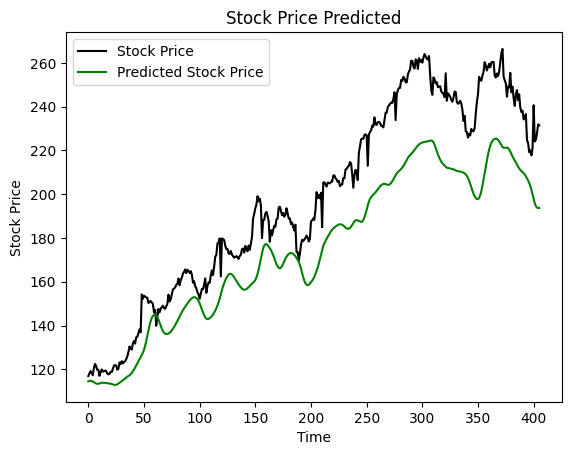

-----------------------------------
1
Epoch 1/10
21/21 [==============================] - 5s 62ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 7.9929e-04 - val_loss: 0.0050
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 5.9650e-04 - val_loss: 0.0037
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 5.3449e-04 - val_loss: 0.0036
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 5.0174e-04 - val_loss: 0.0035
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 5.2883e-04 - val_loss: 0.0036
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 4.7065e-04 - val_loss: 0.0038
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 4.9683e-04 - val_loss: 0.0035
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 4.4536e-04 - val_loss: 0.0055
Epoch 10/10
13/13 [====================

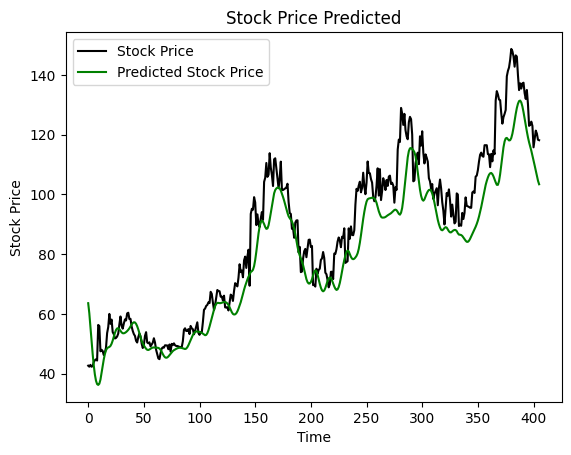

-----------------------------------
2
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 8.3488e-04 - val_loss: 3.1533e-04
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 2.1021e-04 - val_loss: 1.9611e-04
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 1.7723e-04 - val_loss: 1.9782e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 1.5800e-04 - val_loss: 1.4615e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 1.4831e-04 - val_loss: 2.1660e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 1.5041e-04 - val_loss: 2.4102e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 1.5018e-04 - val_loss: 1.8522e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 1.4532e-04 - val_loss: 1.2358e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 1.2676e-04 - val_loss: 1.5275e-04

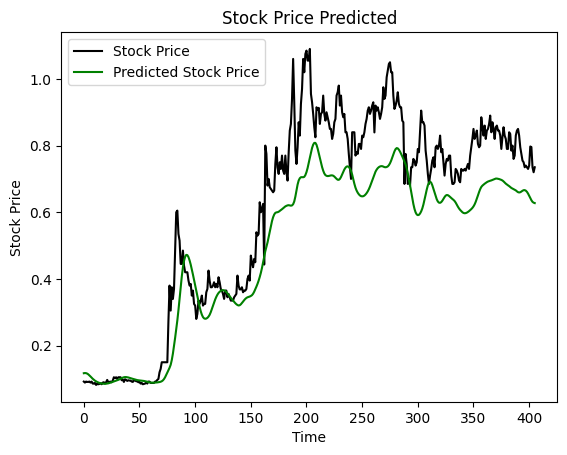

-----------------------------------
3
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0229 - val_loss: 0.0048
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 4/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


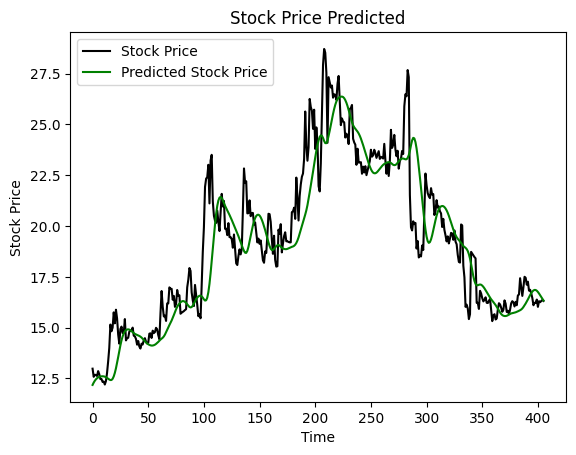

-----------------------------------
4
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0023 - val_loss: 4.7701e-04
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 4.8020e-04 - val_loss: 3.7009e-04
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 3.9002e-04 - val_loss: 3.5083e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 3.6873e-04 - val_loss: 4.2018e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 3.3248e-04 - val_loss: 3.9882e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 3.5605e-04 - val_loss: 4.8661e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 3.9253e-04 - val_loss: 5.8301e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 3.4582e-04 - val_loss: 3.6476e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 3.4636e-04 - val_loss: 3.0483e-04
Epo

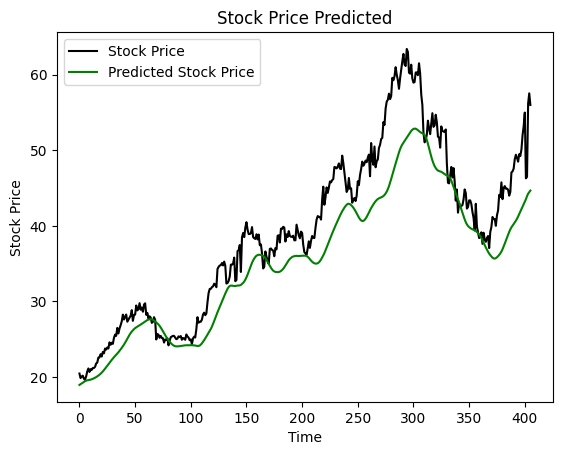

-----------------------------------
5
Epoch 1/10
21/21 [==============================] - 5s 57ms/step - loss: 0.0320 - val_loss: 0.0018
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0098 - val_loss: 0.0020
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0087 - val_loss: 0.0016
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0073 - val_loss: 0.0016
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0075 - val_loss: 0.0030
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0062 - val_loss: 0.0016
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0062 - val_loss: 0.0015
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


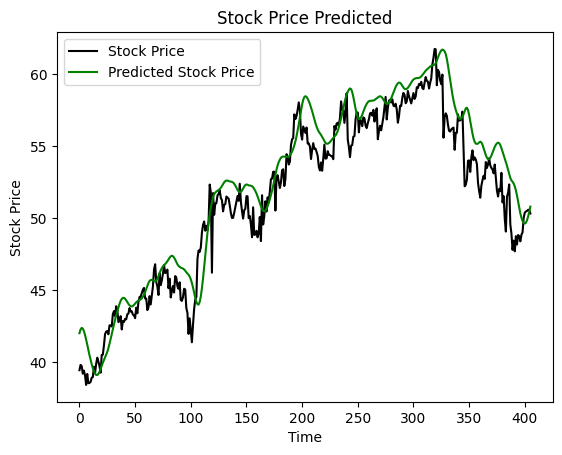

-----------------------------------
6
Epoch 1/10
21/21 [==============================] - 6s 59ms/step - loss: 0.0036 - val_loss: 3.3523e-04
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 2.3708e-04
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 9.1843e-04 - val_loss: 1.1879e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 8.8048e-04 - val_loss: 1.2516e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 8.5373e-04 - val_loss: 1.1452e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 7.8257e-04 - val_loss: 1.2652e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 7.4310e-04 - val_loss: 1.1122e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 8.4095e-04 - val_loss: 1.2738e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 7.9932e-04 - val_loss: 1.5893e-04
Epoch 1

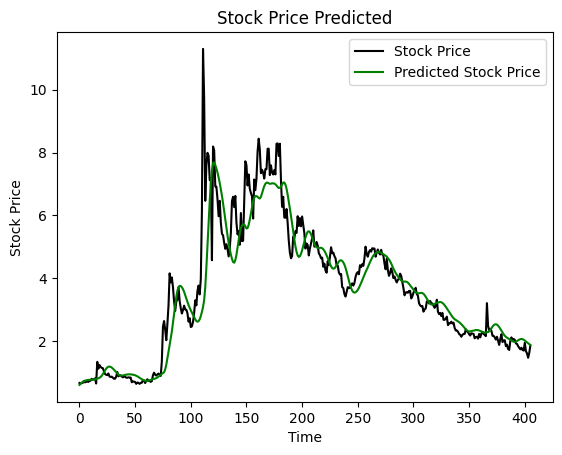

-----------------------------------
7
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0160 - val_loss: 0.0015
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 9.7815e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 9.5466e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 9.5605e-04
Epoch 10/10
13/13 [==============================] - 1s 5ms

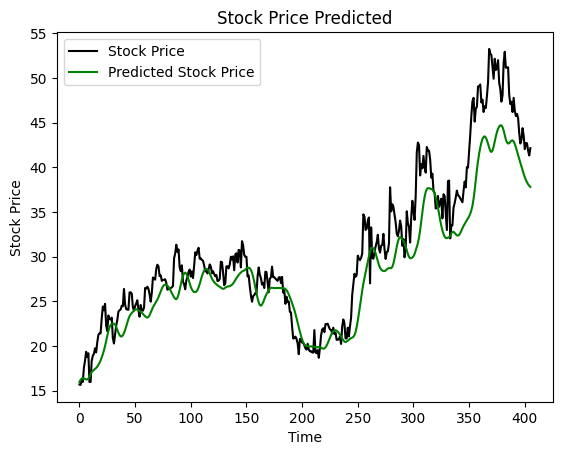

-----------------------------------
8
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0055 - val_loss: 8.1698e-04
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 8.5689e-04
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 8.3218e-04 - val_loss: 6.9937e-04
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 7.6721e-04 - val_loss: 6.8379e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 7.5276e-04 - val_loss: 6.5436e-04
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 7.0494e-04 - val_loss: 6.0283e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 7.1170e-04 - val_loss: 5.8639e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 6.2393e-04 - val_loss: 6.1531e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 5.9615e-04 - val_loss: 5.9083e-04
Epoch 1

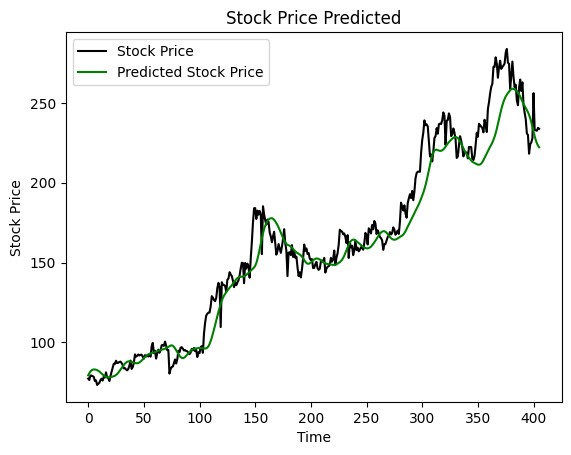

-----------------------------------
9
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0195 - val_loss: 0.0106
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0076
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0073
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0046 - val_loss: 0.0074
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0057
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0056
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


-----------------------------------
10
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0210 - val_loss: 0.0080
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0059
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0037 - val_loss: 0.0060
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


-----------------------------------
11
Epoch 1/10
21/21 [==============================] - 6s 59ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 5.9880e-04 - val_loss: 9.7750e-04
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 5.4527e-04 - val_loss: 0.0018
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 4.6833e-04 - val_loss: 9.3083e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 4.6912e-04 - val_loss: 0.0021
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 5.3374e-04 - val_loss: 0.0020
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 4.9210e-04 - val_loss: 9.6727e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 4.5530e-04 - val_loss: 9.8071e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 4.3076e-04 - val_loss: 0.0011
Epoch 10/10
13/13 [===

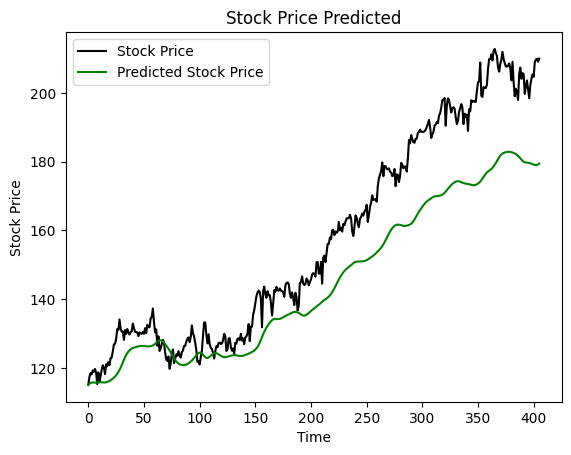

-----------------------------------
12
Epoch 1/10
21/21 [==============================] - 6s 60ms/step - loss: 0.0188 - val_loss: 0.0063
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0058 - val_loss: 0.0029
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


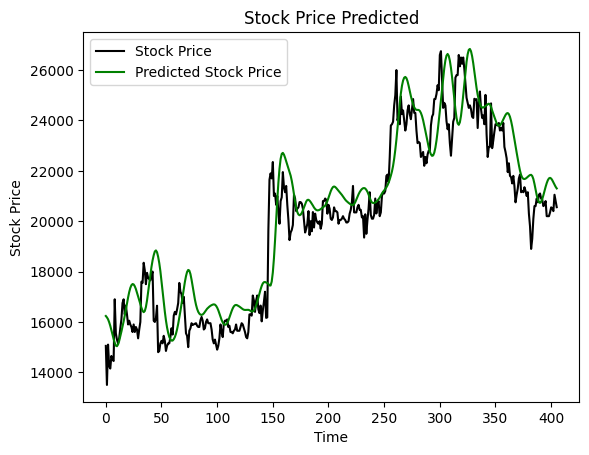

-----------------------------------
13
Epoch 1/10
21/21 [==============================] - 6s 59ms/step - loss: 0.0812 - val_loss: 0.0155
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0136 - val_loss: 0.0020
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0104 - val_loss: 9.3817e-04
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0094 - val_loss: 4.5627e-06
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 0.0015
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 5.7444e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0092 - val_loss: 6.3258e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0078 - val_loss: 0.0030
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0094 - val_loss: 5.3670e-04
Epoch 10/10
13/13 [==============================]

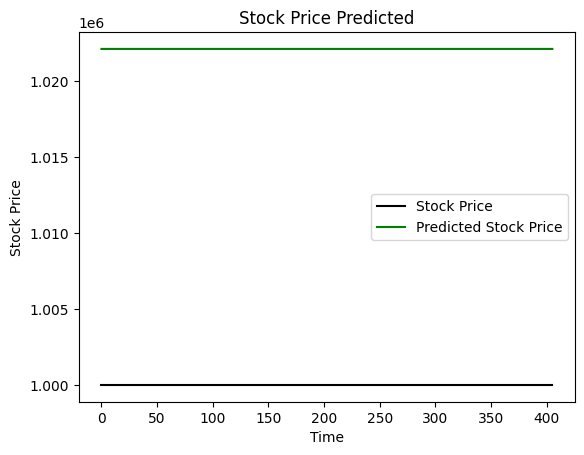

-----------------------------------
14
Epoch 1/10
21/21 [==============================] - 6s 58ms/step - loss: 0.0201 - val_loss: 0.0021
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


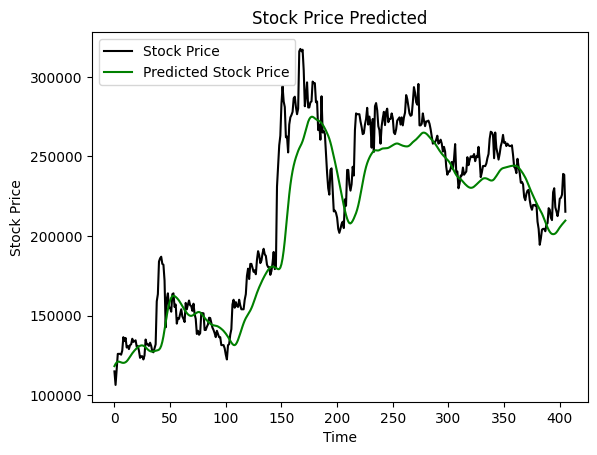

-----------------------------------
15
Epoch 1/10
21/21 [==============================] - 5s 57ms/step - loss: 0.0093 - val_loss: 0.0011
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 9.3238e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 7.7372e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 7.0505e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 7.6492e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 9.4718e-04 - val_loss: 6.7332e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 6.4922e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 8.9685e-04 - val_loss: 6.4165e-04
Epoch 10/10
13/13 [===============

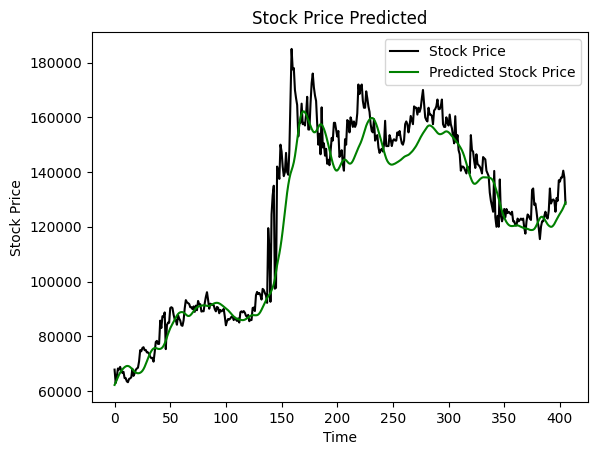

-----------------------------------
16
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0142 - val_loss: 0.0011
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 8.7265e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 8.0853e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 8.4935e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 8.0710e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 7.5653e-04
Epoch 10/10
13/13 [==============================]

-----------------------------------
17
Epoch 1/10
21/21 [==============================] - 5s 57ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 9.7451e-04 - val_loss: 0.0025
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 7.0759e-04 - val_loss: 0.0026
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 6.3850e-04 - val_loss: 0.0021
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 6.3049e-04 - val_loss: 0.0013
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0967e-04 - val_loss: 0.0022
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 8.0512e-04 - val_loss: 0.0018
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 6.0580e-04 - val_loss: 0.0020
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 4.7977e-04 - val_loss: 0.0036
Epoch 10/10
13/13 [===================

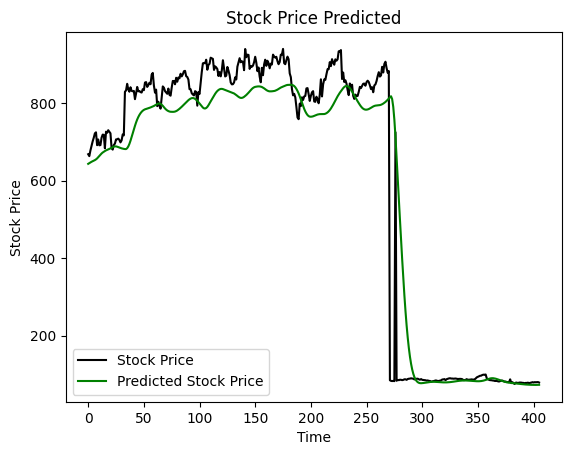

-----------------------------------
18
Epoch 1/10
21/21 [==============================] - 6s 59ms/step - loss: 0.0350 - val_loss: 0.0020
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


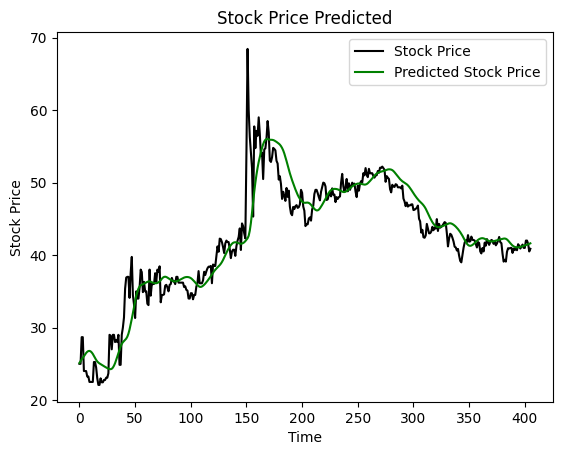

-----------------------------------
19
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 4.6593e-04 - val_loss: 7.5668e-04
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 3.9706e-04 - val_loss: 6.3266e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 3.7616e-04 - val_loss: 6.8626e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 3.7472e-04 - val_loss: 8.0790e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 3.0864e-04 - val_loss: 5.6115e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 3.1883e-04 - val_loss: 6.5127e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 2.7928e-04 - val_loss: 5.2095e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 2.9248e-04 - val_loss: 5.3482e-04
Epoch 

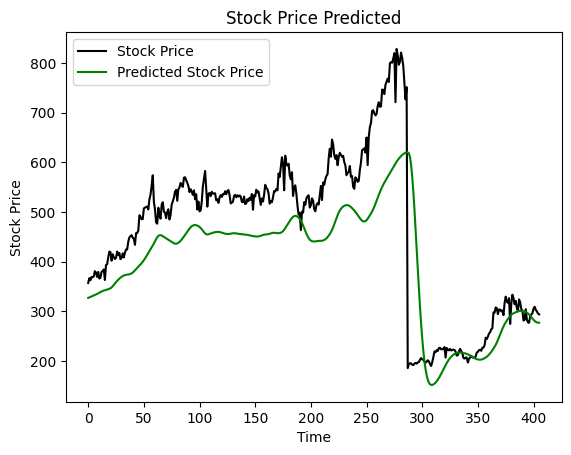

-----------------------------------
20
Epoch 1/10
21/21 [==============================] - 5s 57ms/step - loss: 0.0101 - val_loss: 0.0029
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


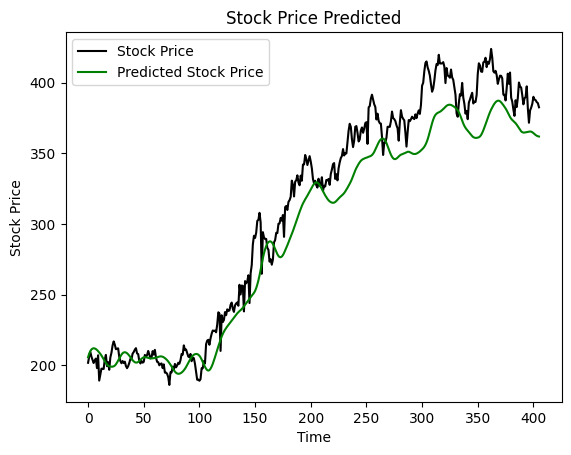

-----------------------------------
21
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 7.9767e-04 - val_loss: 0.0010
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 6.4342e-04 - val_loss: 9.5338e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 5.8520e-04 - val_loss: 9.2481e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0072e-04 - val_loss: 8.9204e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 5.7529e-04 - val_loss: 8.6329e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 5.8953e-04 - val_loss: 8.9687e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 5.4085e-04 - val_loss: 8.6657e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 5.1843e-04 - val_loss: 7.9564e-04
Epoch 10/1

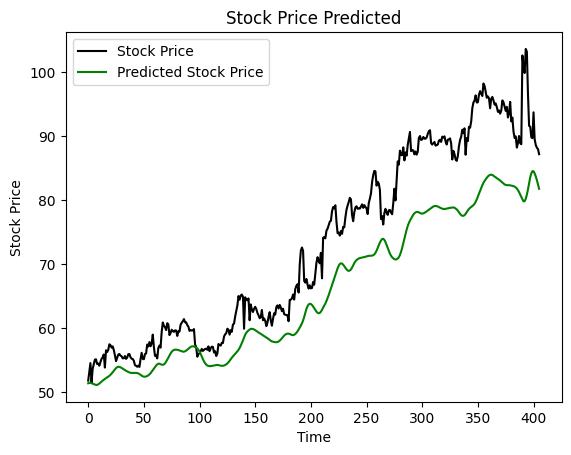

-----------------------------------
22
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0713 - val_loss: 0.0134
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0123 - val_loss: 0.0218
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0089 - val_loss: 0.0183
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


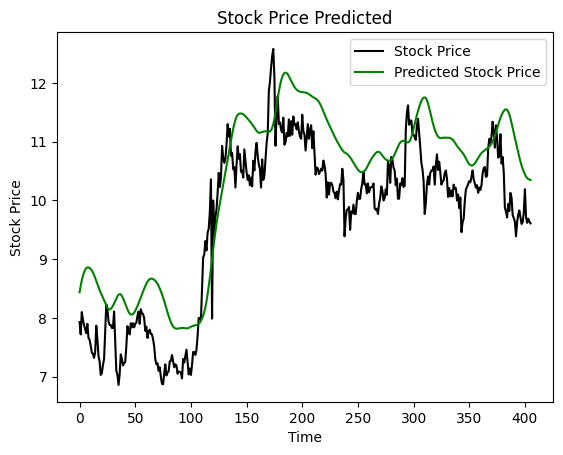

-----------------------------------
23
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0863 - val_loss: 0.0017
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0200 - val_loss: 5.6388e-05
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0154 - val_loss: 5.3280e-04
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 1.1170e-05
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0137 - val_loss: 1.7979e-04
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0132 - val_loss: 1.8215e-05
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 5.0199e-05
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0124 - val_loss: 2.3835e-05
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0124 - val_loss: 1.2049e-05
Epoch 10/10
13/13 [===================

-----------------------------------
24
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0054 - val_loss: 0.0083
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 8.1217e-04
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 7.9669e-04 - val_loss: 8.7140e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 7.5104e-04 - val_loss: 0.0011
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 6.4447e-04 - val_loss: 5.9748e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 7.1472e-04 - val_loss: 8.8982e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 6.5449e-04 - val_loss: 7.3184e-04
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 6.8645e-04 - val_loss: 4.6439e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 7.1089e-04 - val_loss: 0.0011
Epoch 10/10
13/13 

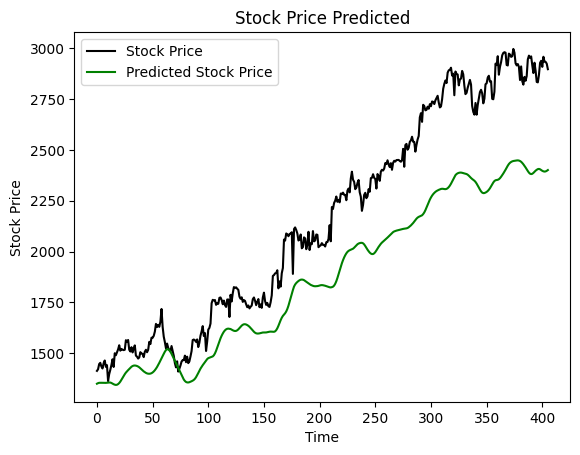

-----------------------------------
25
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 3.9895e-04 - val_loss: 0.0015
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 3.3010e-04 - val_loss: 0.0012
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 2.9079e-04 - val_loss: 9.4864e-04
Epoch 5/10
21/21 [==============================] - 0s 14ms/step - loss: 2.5840e-04 - val_loss: 8.9636e-04
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 2.8364e-04 - val_loss: 0.0011
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 2.5696e-04 - val_loss: 9.6465e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 2.4998e-04 - val_loss: 8.0513e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 2.4675e-04 - val_loss: 8.4090e-04
Epoch 10/10
13/13 

-----------------------------------
26
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 8.2096e-04 - val_loss: 0.0023
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 8.2976e-04 - val_loss: 0.0021
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 7.9549e-04 - val_loss: 0.0019
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 7.6396e-04 - val_loss: 0.0022
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 7.2977e-04 - val_loss: 0.0017
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 6.8625e-04 - val_loss: 0.0016
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 6.7799e-04 - val_loss: 0.0018
Epoch 10/10
13/13 [=======================

-----------------------------------
27
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0168 - val_loss: 0.0046
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


-----------------------------------
28
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 6.6730e-04 - val_loss: 0.0025
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 5.4726e-04 - val_loss: 0.0012
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 5.2102e-04 - val_loss: 0.0025
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 4.7326e-04 - val_loss: 0.0011
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 4.1986e-04 - val_loss: 0.0012
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 4.2249e-04 - val_loss: 0.0010
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 4.0152e-04 - val_loss: 0.0010
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 3.8021e-04 - val_loss: 0.0011
Epoch 10/10
13/13 [===================

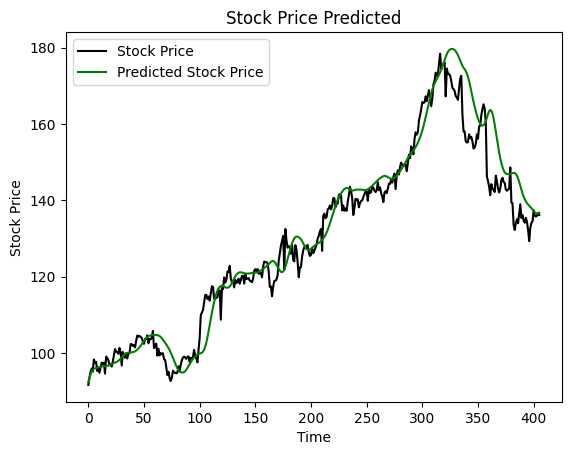

-----------------------------------
29
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 9.6968e-04 - val_loss: 0.0023
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 9.2116e-04 - val_loss: 0.0022
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 8.1795e-04 - val_loss: 0.0020
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 9.1918e-04 - val_loss: 0.0019
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 8.1486e-04 - val_loss: 0.0019
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 8.4984e-04 - val_loss: 0.0021
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 9.0355e-04 - val_loss: 0.0018
Epoch 10/10
13/13 [=======================

-----------------------------------
30
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 4.3150e-04 - val_loss: 9.4090e-04
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 3.6796e-04 - val_loss: 0.0023
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 3.5671e-04 - val_loss: 8.8550e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 3.2892e-04 - val_loss: 8.2124e-04
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 3.8257e-04 - val_loss: 0.0019
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 3.8170e-04 - val_loss: 0.0012
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 3.2660e-04 - val_loss: 0.0013
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 2.9380e-04 - val_loss: 8.3664e-04
Epoch 10/10
13/13 [===

-----------------------------------
31
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 9.9335e-04 - val_loss: 0.0012
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 7.2742e-04 - val_loss: 0.0014
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 6.5648e-04 - val_loss: 0.0023
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 6.4794e-04 - val_loss: 0.0016
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 6.4342e-04 - val_loss: 0.0025
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 6.1010e-04 - val_loss: 0.0012
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 5.7561e-04 - val_loss: 0.0019
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 5.8462e-04 - val_loss: 0.0018
Epoch 10/10
13/13 [===================

-----------------------------------
32
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 7.8157e-04 - val_loss: 0.0020
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 6.7344e-04 - val_loss: 0.0015
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0447e-04 - val_loss: 0.0016
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 5.6575e-04 - val_loss: 0.0022
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0861e-04 - val_loss: 0.0016
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 5.9755e-04 - val_loss: 0.0014
Epoch 8/10
21/21 [==============================] - 0s 14ms/step - loss: 5.6960e-04 - val_loss: 0.0012
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 5.2751e-04 - val_loss: 0.0014
Epoch 10/10
13/13 [===================

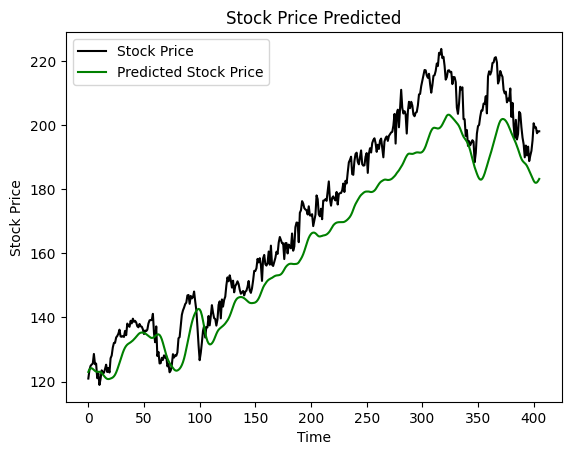

-----------------------------------
33
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 9.1342e-04 - val_loss: 0.0017
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 8.8690e-04 - val_loss: 0.0018
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 8.4074e-04 - val_loss: 0.0019
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 8.3521e-04 - val_loss: 0.0031
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 9.0965e-04 - val_loss: 0.0025
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 8.5539e-04 - val_loss: 0.0016
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 7.4536e-04 - val_loss: 0.0014
Epoch 10/10
13/13 [=======================

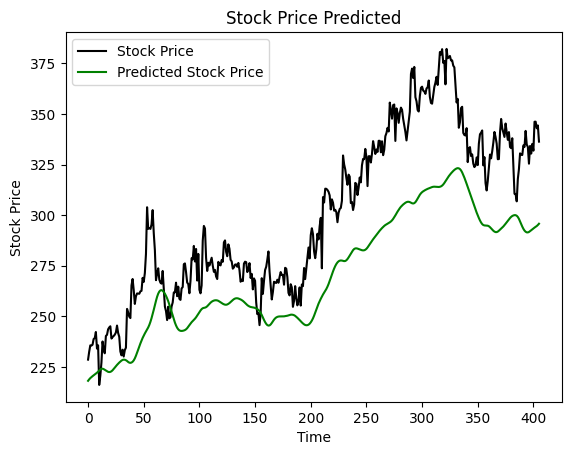

-----------------------------------
34
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0129 - val_loss: 0.0222
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


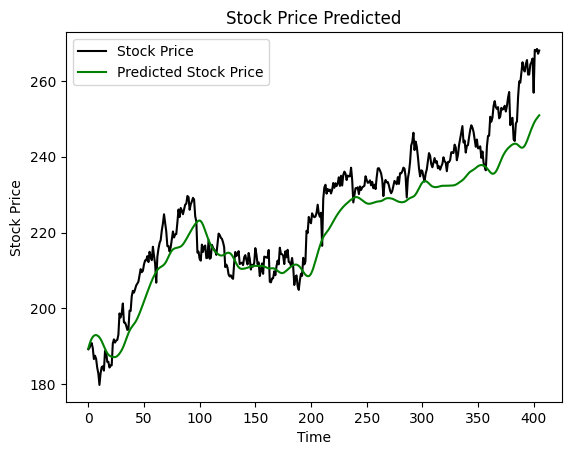

-----------------------------------
35
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 7.2639e-04 - val_loss: 0.0012
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 6.5614e-04 - val_loss: 0.0015
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 6.4361e-04 - val_loss: 0.0011
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 6.9271e-04 - val_loss: 0.0014
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 6.1750e-04 - val_loss: 0.0010
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 5.3412e-04 - val_loss: 0.0013
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 6.2859e-04 - val_loss: 0.0027
Epoch 10/10
13/13 [=======================

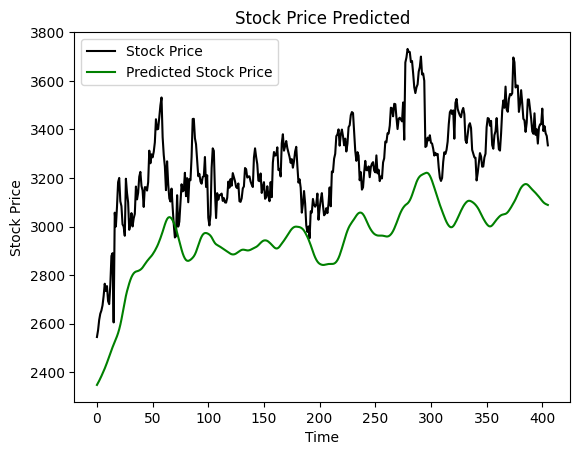

-----------------------------------
36
Epoch 1/10
21/21 [==============================] - 5s 62ms/step - loss: 0.0324 - val_loss: 0.0029
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


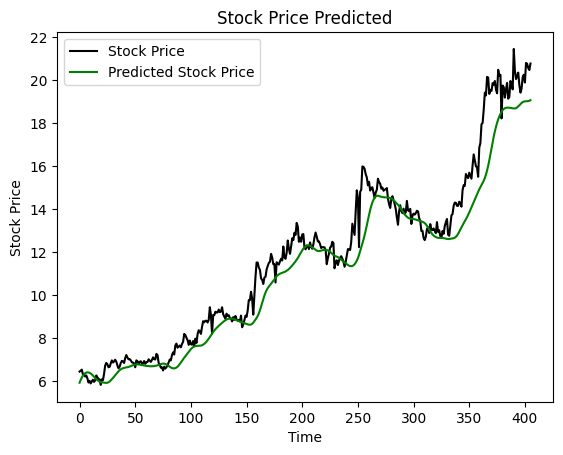

-----------------------------------
37
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0524 - val_loss: 0.0031
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0090 - val_loss: 0.0031
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0066 - val_loss: 0.0017
Epoch 4/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0017
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 8/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


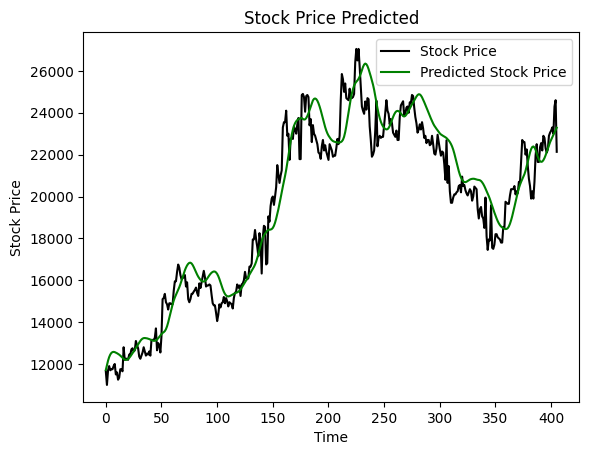

-----------------------------------
38
Epoch 1/10
21/21 [==============================] - 7s 58ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 9.0146e-04 - val_loss: 0.0011
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 6.6577e-04 - val_loss: 0.0010
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 6.3819e-04 - val_loss: 0.0010
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0946e-04 - val_loss: 9.1053e-04
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 6.3392e-04 - val_loss: 0.0010
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0618e-04 - val_loss: 8.3709e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 5.9293e-04 - val_loss: 8.3044e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 5.4294e-04 - val_loss: 7.8367e-04
Epoch 10/10
13/13 [===

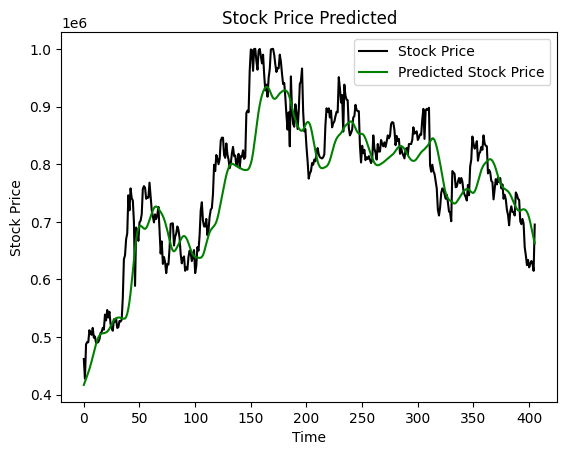

-----------------------------------
39
Epoch 1/10
21/21 [==============================] - 5s 60ms/step - loss: 0.0147 - val_loss: 0.0012
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 9.5631e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 8.1402e-04
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 8.4909e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 7.8067e-04
Epoch 8/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 7.2828e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 6.9672e-04
Epoch 10/10
13/13 [===========================

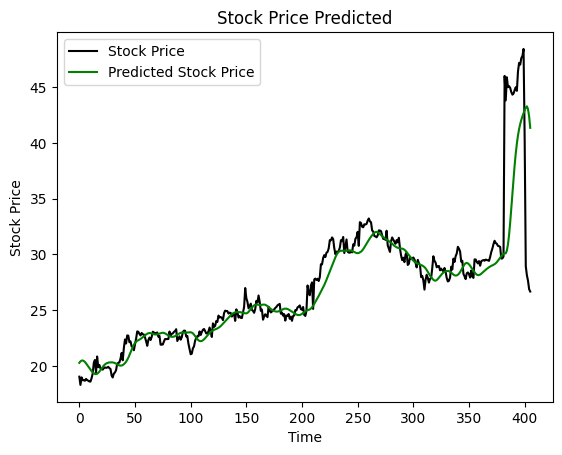

-----------------------------------
40
Epoch 1/10
21/21 [==============================] - 6s 59ms/step - loss: 0.0044 - val_loss: 0.0056
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0417e-04 - val_loss: 0.0010
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 4.3066e-04 - val_loss: 0.0011
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 3.7643e-04 - val_loss: 0.0010
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 3.3883e-04 - val_loss: 0.0013
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 3.3031e-04 - val_loss: 0.0017
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 3.0564e-04 - val_loss: 0.0011
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 2.8625e-04 - val_loss: 0.0012
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 2.9214e-04 - val_loss: 8.7624e-04
Epoch 10/10
13/13 [===============

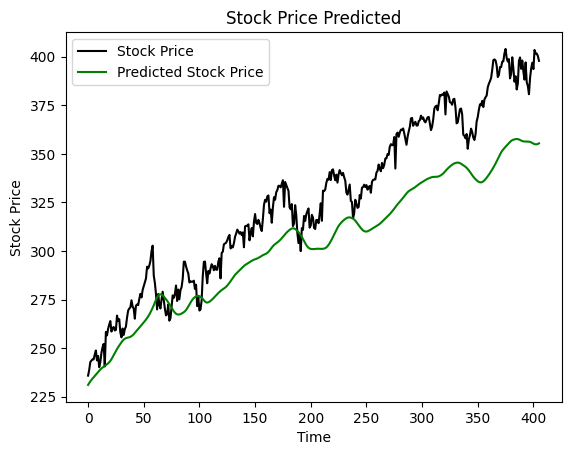

-----------------------------------
41
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 6.4786e-04 - val_loss: 0.0022
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 5.4955e-04 - val_loss: 0.0020
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 4.9964e-04 - val_loss: 0.0018
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 5.0224e-04 - val_loss: 0.0018
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 4.9103e-04 - val_loss: 0.0017
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 5.1045e-04 - val_loss: 0.0016
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 4.2430e-04 - val_loss: 0.0018
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 4.1613e-04 - val_loss: 0.0016
Epoch 10/10
13/13 [===================

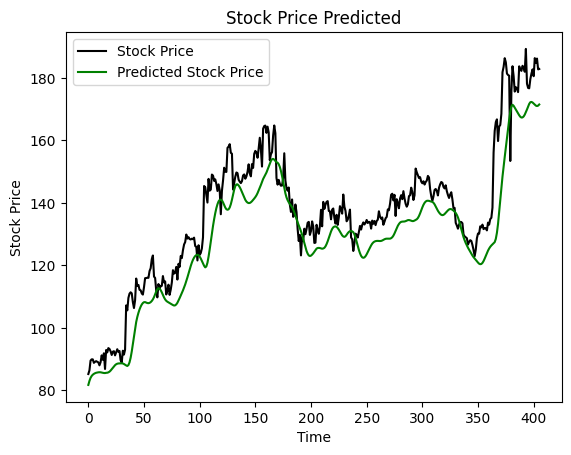

-----------------------------------
42
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 9.4984e-04 - val_loss: 0.0012
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 6.8371e-04 - val_loss: 0.0015
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 6.8170e-04 - val_loss: 0.0012
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 6.5392e-04 - val_loss: 0.0019
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 7.1069e-04 - val_loss: 0.0012
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 6.0427e-04 - val_loss: 0.0011
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 6.1649e-04 - val_loss: 0.0011
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 6.6638e-04 - val_loss: 0.0011
Epoch 10/10
13/13 [===================

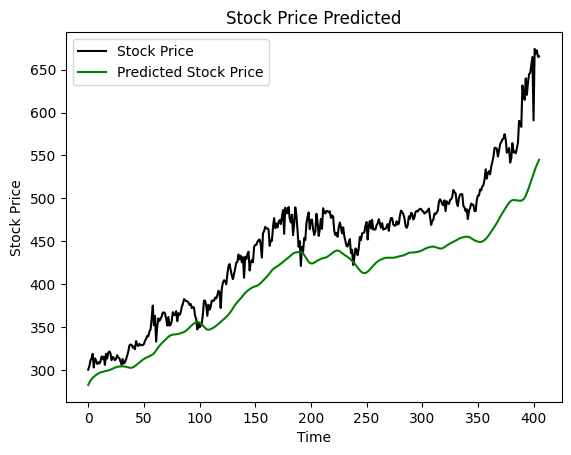

-----------------------------------
43
Epoch 1/10
21/21 [==============================] - 7s 57ms/step - loss: 0.0135 - val_loss: 7.2925e-04
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0085 - val_loss: 6.1946e-04
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0068 - val_loss: 4.0590e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 6.4148e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0066 - val_loss: 3.6314e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 4.9965e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0060 - val_loss: 0.0012
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 4.2675e-04
Epoch 10/10
13/13 [=======================

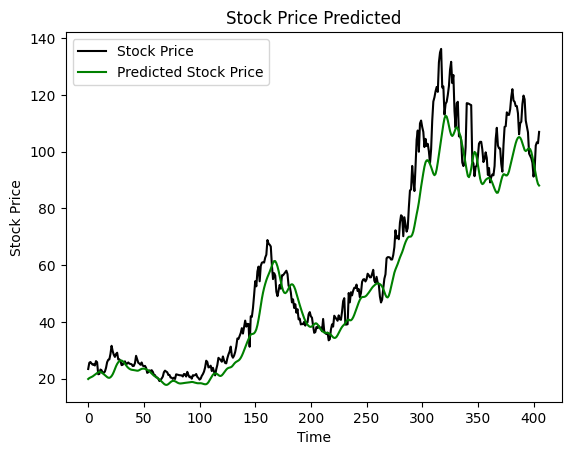

-----------------------------------
44
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0051 - val_loss: 0.0090
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 7.2068e-04 - val_loss: 0.0048
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 6.0974e-04 - val_loss: 0.0041
Epoch 4/10
21/21 [==============================] - 0s 14ms/step - loss: 5.6712e-04 - val_loss: 0.0030
Epoch 5/10
21/21 [==============================] - 0s 14ms/step - loss: 5.7092e-04 - val_loss: 0.0075
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 5.4208e-04 - val_loss: 0.0048
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 5.0506e-04 - val_loss: 0.0036
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 4.6418e-04 - val_loss: 0.0046
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 4.9277e-04 - val_loss: 0.0033
Epoch 10/10
13/13 [===================

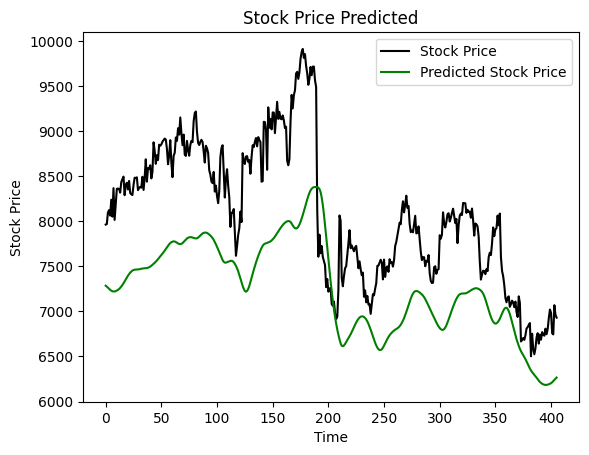

-----------------------------------
45
Epoch 1/10
21/21 [==============================] - 6s 61ms/step - loss: 0.0306 - val_loss: 0.0030
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


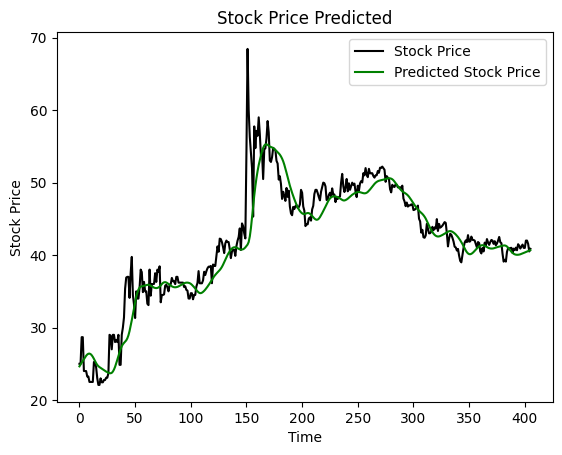

-----------------------------------
46
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0216 - val_loss: 0.0073
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0063
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0049 - val_loss: 0.0069
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0062
Epoch 8/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0053
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


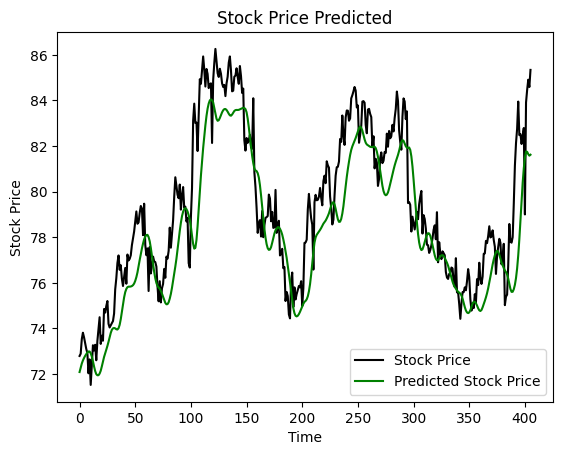

-----------------------------------
47
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0328 - val_loss: 0.0119
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0103
Epoch 3/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0060 - val_loss: 0.0084
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


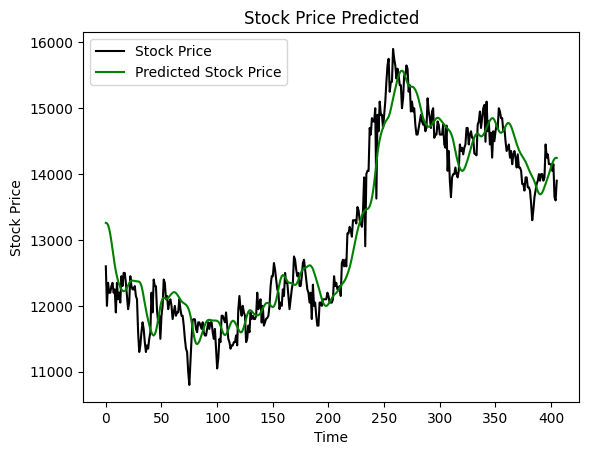

-----------------------------------
48
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0010 - val_loss: 1.8256e-04
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 3.1941e-04 - val_loss: 1.6135e-04
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 3.1136e-04 - val_loss: 1.5638e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 2.9031e-04 - val_loss: 1.3240e-04
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 2.9071e-04 - val_loss: 1.7531e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 3.0063e-04 - val_loss: 1.1952e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 2.8160e-04 - val_loss: 1.0251e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 2.5116e-04 - val_loss: 1.0477e-04
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 2.7281e-04 - val_loss: 1.2782e-04
Ep

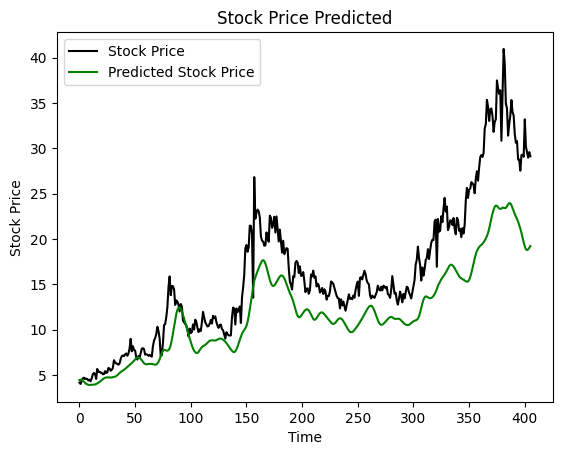

-----------------------------------
49
Epoch 1/10
21/21 [==============================] - 5s 61ms/step - loss: 0.0018 - val_loss: 8.6867e-04
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 3.9848e-04 - val_loss: 0.0015
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 3.1637e-04 - val_loss: 5.8262e-04
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 2.7864e-04 - val_loss: 5.0348e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 2.8946e-04 - val_loss: 6.7175e-04
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 2.6977e-04 - val_loss: 8.7501e-04
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 2.7060e-04 - val_loss: 4.2164e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 3.0450e-04 - val_loss: 3.1451e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 2.6932e-04 - val_loss: 4.1495e-04
Epoch 

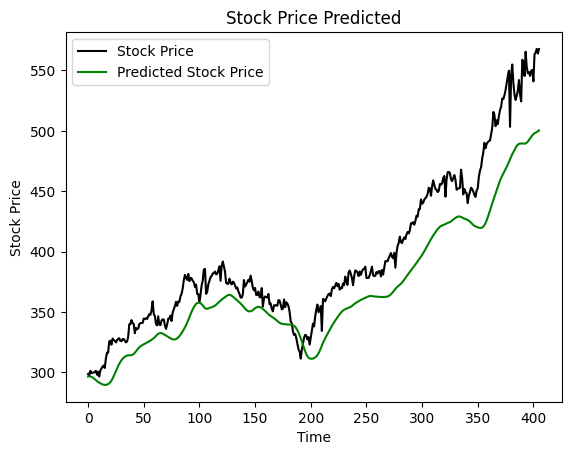

-----------------------------------
50
Epoch 1/10
21/21 [==============================] - 5s 58ms/step - loss: 0.0132 - val_loss: 0.0543
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 8/10
21/21 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


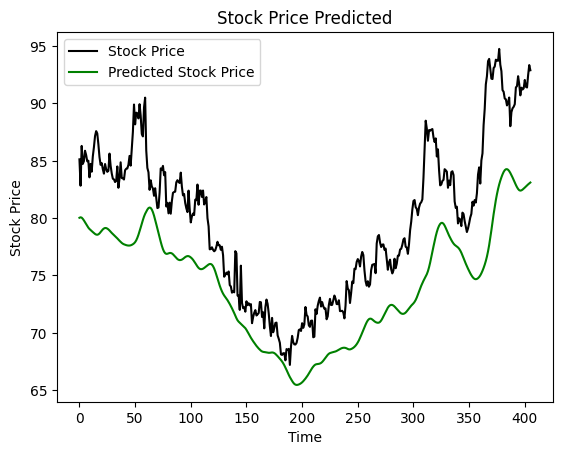

-----------------------------------
51
Epoch 1/10
21/21 [==============================] - 8s 60ms/step - loss: 0.0104 - val_loss: 0.0218
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0094
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 4/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 5/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 9.6975e-04 - val_loss: 0.0040
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 9.4410e-04 - val_loss: 0.0054
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 10/10
13/13 [==============================] - 1s 4ms/st

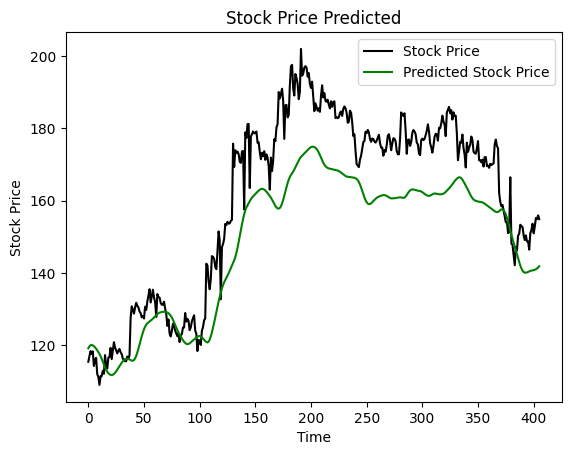

-----------------------------------
52
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0069 - val_loss: 5.2602e-04
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 4.0506e-04
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 3.8218e-04
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 3.3922e-04
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 3.3756e-04
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 3.2903e-04
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 2.9025e-04
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 3.8039e-04
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 2.5757e-04
Epoch 10/10
13/13 [===============

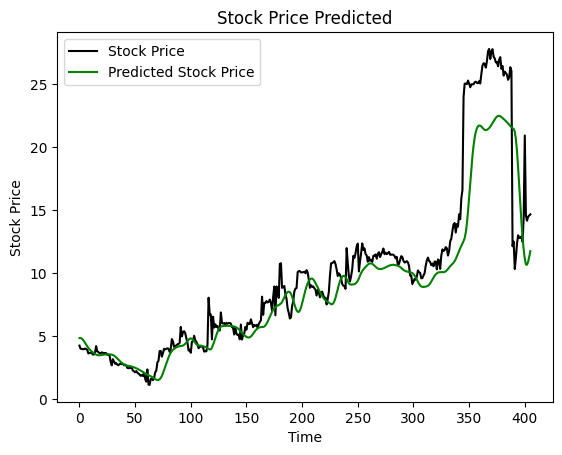

-----------------------------------
53
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0381 - val_loss: 0.0024
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0043
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0068 - val_loss: 0.0021
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


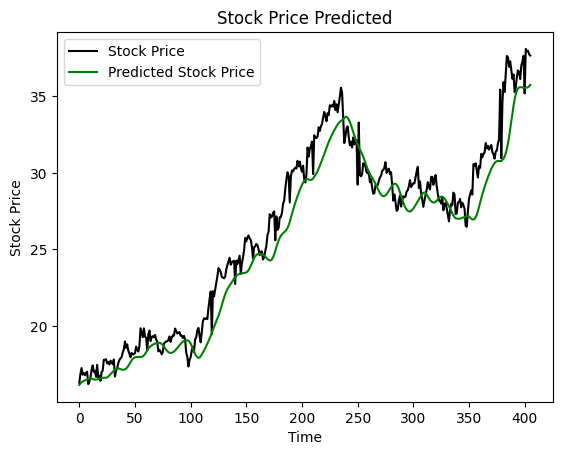

-----------------------------------
54
Epoch 1/10
21/21 [==============================] - 8s 61ms/step - loss: 0.0199 - val_loss: 0.0044
Epoch 2/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


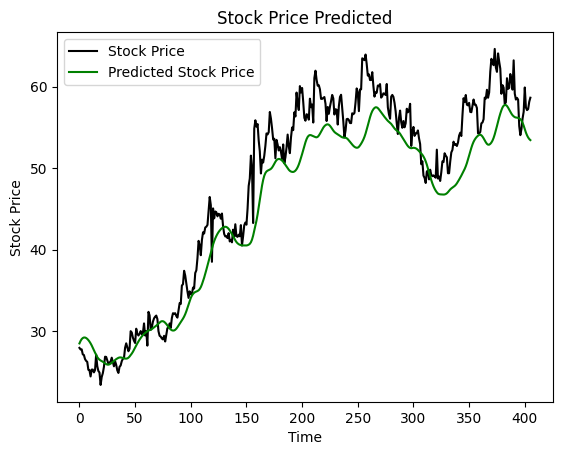

-----------------------------------
55
Epoch 1/10
21/21 [==============================] - 5s 57ms/step - loss: 0.0147 - val_loss: 0.0371
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0194
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0139
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0115
Epoch 5/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0135
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0089
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0027 - val_loss: 0.0139
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0134
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0115
Epoch 10/10
13/13 [==============================] - 1s 5ms/step


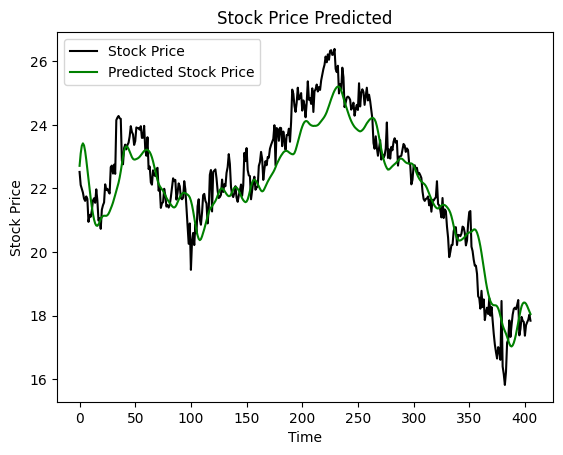

-----------------------------------
56
Epoch 1/10
21/21 [==============================] - 5s 59ms/step - loss: 0.0310 - val_loss: 0.0040
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 9/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 10/10
13/13 [==============================] - 1s 4ms/step


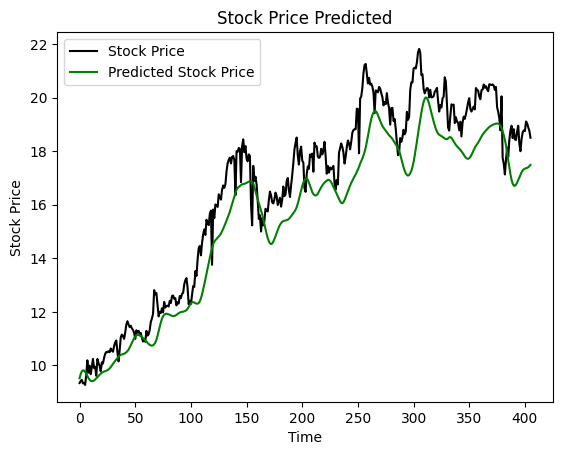

-----------------------------------


In [29]:
pd.options.mode.chained_assignment = None

def sequentialEmbeddings(node_list): #return the seq embeddings (for [t-step.....t]), and its date range.
  time_steps = 60
  window_sizes = [5, 10, 30]
  actual_applied_date_range = node_list[0][4]['Date'].iloc[time_steps:-1] #最后输出的sequence的时间范围
  # print(actual_applied_date_range)

  embeddings = []

  count = 0
  for node in node_list: #1 has some problems
    print(count)
    targets = []
    sequences = []
    df = node[4].drop(['Low', 'High', 'Volume', 'Adjusted_close'],axis=1)
    num_rows = len(df)
    date_idx = df['Date']

    transforms = {} #on Xs and also on the y
    scaled_df = pd.DataFrame()
    scaled_df['Date'] = date_idx
    for col in df.columns[1:]:
      sc = MinMaxScaler(feature_range=(0,1))
      scaled_df[col] = sc.fit_transform(np.reshape(np.array(df[col]), (num_rows,1)))
      transforms[col] = sc

    assert scaled_df.shape == df.shape

    for i in np.arange(time_steps, num_rows - 1):
      sequence = scaled_df.iloc[i - time_steps:i]
      for window_size in window_sizes:
        sequence[f'ma_{window_size}'] = sequence.loc[:,'Close'].rolling(window=window_size).mean()
        sequence[f'ma_{window_size}'].fillna(0, inplace=True)
      target = scaled_df.loc[i + 1,'Close']
      sequences.append(sequence)
      targets.append(target)


    sequences = np.array([seq.drop(['Date'], axis=1).values for seq in sequences])
    targets = np.array(targets)

    # normalized_sequences = [(seq - seq.max()) / seq.std() for seq in sequences]
    # normalized_targets = (targets - targets.max()) / targets.std()
    split_ratio = 0.8
    X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
      sequences, targets, test_size=1 - split_ratio, random_state=42, shuffle=False)
    # Convert the split results back to TensorFlow tensors
    X_train = tf.convert_to_tensor(X_train_np)
    X_test = tf.convert_to_tensor(X_test_np)
    y_train = tf.convert_to_tensor(y_train_np)
    y_test = tf.convert_to_tensor(y_test_np)

    num_features = len(X_train[0][0])
    model = Sequential()
    model.add(LSTM(units=256,return_sequences=True, input_shape=(time_steps, num_features)))
    model.add(Dropout(0.2)),
    model.add(LSTM(units=128,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=10,batch_size=64, validation_split=0.2)

    #reverse back the scale
    embedding = transforms['Close'].inverse_transform(model.predict(sequences))

    assert len(embedding) == len(actual_applied_date_range)

    #on test set
    plt.plot(transforms['Close'].inverse_transform(np.reshape(y_test.numpy(), (len(y_test.numpy()),1))), color = 'black', label = 'Stock Price')
    plt.plot(transforms['Close'].inverse_transform(model.predict(X_test)),
             color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Predicted')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    #on the whole unnormed set
    # plt.plot(transforms['Close'].inverse_transform(targets.reshape(len(targets),1)), color = 'black', label = 'Stock Price')
    # plt.plot(embedding,
    #          color = 'green', label = 'Predicted Stock Price')
    # plt.title('Stock Price Predicted')
    # plt.xlabel('Time')
    # plt.ylabel('Stock Price')
    # plt.legend()
    # plt.show()
    print("-----------------------------------")

    embeddings.append(embedding)
    count += 1
  return embeddings, actual_applied_date_range #注意这个embedding的意义是针对t+1时刻的一个波动

embeddings, date_range = sequentialEmbeddings(small_node_list)

In [30]:
#save the result into a dataframe with the date_range as the index col
out_df = pd.DataFrame()
out_df['Date'] = date_range
col_idx = 1
for embed in embeddings:
  out_df[col_idx] = embed
  col_idx +=1
out_df

Date           1           2         3          4          5  \
60   2014-03-27   60.230442   37.252045  0.035016  22.681608  11.524383   
61   2014-03-28   60.060333   36.518463  0.034572  22.764273  11.468749   
62   2014-03-31   59.945469   35.865425  0.034145  22.821630  11.424247   
63   2014-04-01   59.902287   35.252964  0.033697  22.857033  11.392011   
64   2014-04-02   59.936050   34.710594  0.033221  22.881315  11.372475   
...         ...         ...         ...       ...        ...        ...   
2081 2021-12-24  195.837173  109.717751  0.642859  16.677685  43.515518   
2082 2021-12-27  194.600113  107.971794  0.636156  16.592163  43.918961   
2083 2021-12-28  193.896393  106.191132  0.631248  16.502735  44.247723   
2084 2021-12-29  193.605057  104.613457  0.628774  16.415558  44.451698   
2085 2021-12-30  193.692245  103.421509  0.627488  16.335312  44.663563   

              6         7          8           9  ...            48  \
60    51.907005  3.875131  21.119858   65.812584  ...  10288.719727   
61    51.753651  3.783297  21.365807   65.725220  ...  10304.686523   
62    51.596428  3.670144  21.618122   65.666779  ...  10326.434570   
63    51.460205  3.543303  21.834419   65.652298  ...  10354.645508   
64    51.363567  3.417797  22.009489   65.693291  ...  10386.011719   
...         ...       ...        ...         ...  ...           ...   
2081  49.691406  1.977950  38.593952  229.099411  ...  14163.611328   
2082  49.861965  1.949894  38.334324  226.667557  ...  14203.725586   
2083  50.122425  1.923139  38.109917  224.727966  ...  14232.025391   
2084  50.448021  1.895604  37.945988  223.271271  ...  14248.085938   
2085  50.810879  1.863916  37.816818  222.221390  ...  14245.591797   

             49          50         51          52         53         54  \
60     0.655706  114.512901  36.063011   82.983849   3.432300  29.808285   
61     0.675546  114.387596  36.015083   82.776497   3.333761  30.062086   
62     0.697594  114.244759  35.977089   82.532082   3.246362  30.310333   
63     0.722835  114.079147  35.947586   82.278358   3.174369  30.545811   
64     0.751615  113.896378  35.923908   82.049568   3.120758  30.771496   
...         ...         ...        ...         ...        ...        ...   
2081  18.862608  498.019745  82.759438  140.906998  10.702756  35.572044   
2082  18.772547  498.522797  82.854973  141.056778  10.677647  35.574265   
2083  18.840670  498.952972  82.945518  141.259903  10.923528  35.599270   
2084  19.011311  499.514160  83.026955  141.527512  11.314899  35.661587   
2085  19.209608  500.309052  83.107513  141.864471  11.758219  35.758141   

             55         56         57  
60    34.730843  16.497824  10.703076  
61    34.629910  16.478647  10.683150  
62    34.542603  16.464602  10.672382  
63    34.466156  16.457016  10.681641  
64    34.398251  16.463697  10.724177  
...         ...        ...        ...  
2081  54.360409  18.372213  17.362288  
2082  54.021076  18.304018  17.377254  
2083  53.757664  18.219036  17.402216  
2084  53.565102  18.129837  17.440836  
2085  53.432961  18.048891  17.487690  

[2026 rows x 58 columns]

In [31]:
#save
out_df.to_csv("10051_homograph_LSTM_embeddings_2014-2021.csv",index=False)

In [ ]:
#what to do with the trained LSTM model in a stock? looks like given time t, each node now only has one single feature...which is the "delta"
#lets forget about this, assume now we have the feature vetor under time t of each node, no matter how long is this feature vector.


##simple GNN approach, given sequential embeddings at every time t.

In [32]:
#embeddings aggregation
num_days = len(embeddings[0])
num_comps = len(embeddings)
features = np.reshape(embeddings,(num_days,num_comps))
features.shape

(2026, 57)

In [34]:
#gather the Lithium future price data, note that the date now is matched, because the emebeddings are already the t+1 prices
data = pd.read_csv("/content/Lithium_futures_price_2017-2022.csv")
features = pd.read_csv('/content/10051_homograph_LSTM_embeddings_2014-2021.csv')
data = data.merge(features, how='left', on='Date')
data.dropna(inplace=True)
data

Date      Open      High       Low     Close  Change %  Volume  \
0     2017-05-10  136000.0  140000.0  132000.0  136000.0      0.00       0   
1     2017-05-11  136000.0  140000.0  132000.0  136000.0      0.00       0   
2     2017-05-12  136000.0  140000.0  132000.0  136000.0      0.00       0   
3     2017-05-15  136000.0  140000.0  132000.0  136000.0      0.00       0   
4     2017-05-16  136000.0  140000.0  132000.0  136000.0      0.00       0   
...          ...       ...       ...       ...       ...       ...     ...   
1146  2021-12-24  261500.0  264000.0  259000.0  261500.0      2.75       0   
1147  2021-12-27  268500.0  271000.0  266000.0  268500.0      2.68       0   
1148  2021-12-28  268500.0  271000.0  266000.0  268500.0      0.00       0   
1149  2021-12-29  268500.0  271000.0  266000.0  268500.0      0.00       0   
1150  2021-12-30  268500.0  271000.0  266000.0  268500.0      0.00       0   

               1           2         3  ...         48         49         50  \
0      57.735783   31.769424  0.090137  ...  14332.969   0.806977  174.89641   
1      58.020393   31.796482  0.089466  ...  14306.241   0.815124  175.16853   
2      58.249466   31.120365  0.089027  ...  14265.901   0.821483  175.16713   
3      58.371387   29.592806  0.088848  ...  14211.082   0.825550  174.91957   
4      58.359524   27.358103  0.088878  ...  14142.403   0.827371  174.47827   
...          ...         ...       ...  ...        ...        ...        ...   
1146  195.837170  109.717750  0.642859  ...  14163.611  18.862608  498.01974   
1147  194.600110  107.971794  0.636156  ...  14203.726  18.772547  498.52280   
1148  193.896400  106.191130  0.631248  ...  14232.025  18.840670  498.95297   
1149  193.605060  104.613460  0.628774  ...  14248.086  19.011310  499.51416   
1150  193.692250  103.421510  0.627488  ...  14245.592  19.209608  500.30905   

             51         52         53         54         55         56  \
0     49.560734  112.96303   6.682404  18.414532  33.701610  19.849712   
1     49.667576  112.68516   6.571762  18.471040  33.676850  19.772228   
2     49.768906  112.34290   6.453408  18.529266  33.663864  19.701122   
3     49.865420  111.95517   6.332770  18.587170  33.656796  19.636198   
4     49.957840  111.53774   6.217591  18.643852  33.653645  19.578842   
...         ...        ...        ...        ...        ...        ...   
1146  82.759440  140.90700  10.702756  35.572044  54.360410  18.372213   
1147  82.854970  141.05678  10.677647  35.574265  54.021076  18.304018   
1148  82.945520  141.25990  10.923528  35.599270  53.757664  18.219036   
1149  83.026955  141.52751  11.314899  35.661587  53.565100  18.129837   
1150  83.107510  141.86447  11.758219  35.758140  53.432960  18.048891   

             57  
0     10.946479  
1     10.984672  
2     10.996222  
3     10.984259  
4     10.958702  
...         ...  
1146  17.362288  
1147  17.377254  
1148  17.402216  
1149  17.440836  
1150  17.487690  

[1151 rows x 64 columns]

In [35]:
X = data.iloc[:, 7:]
y = data['Open']
print(X.shape, y.shape)

(1151, 57) (1151,)


Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 21370812416.0000 - val_loss: 12210521088.0000
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 12515805184.0000 - val_loss: 3552824320.0000
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 10616685568.0000 - val_loss: 8288068608.0000
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 6494584320.0000 - val_loss: 10274911232.0000
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 5523743744.0000 - val_loss: 9486059520.0000
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 4771074560.0000 - val_loss: 9896754176.0000
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 3813649152.0000 - val_loss: 8693136384.0000
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 3063835136.0000 - val_loss: 6776122368.0000
Epoch 9/100
14/14 [==============================] - 0s 4m

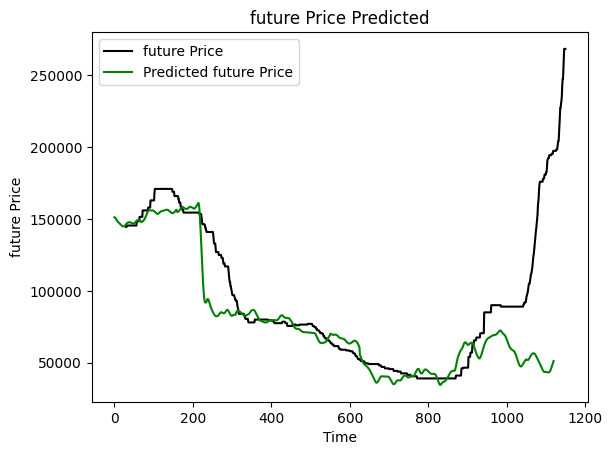

36/36 [==============================] - 0s 1ms/step
(1121, 1)
36/36 [==============================] - 0s 1ms/step
sse: 1995908722286.4463
36/36 [==============================] - 0s 1ms/step
mse: 1780471652.35187


In [36]:
#DNN to fit the embeddings to the Lithium future's price
def train_DNN(X, y):
  split_ratio = 0.8
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 - split_ratio, random_state=42, shuffle=False)
  X_train = tf.convert_to_tensor(X_train)
  X_test = tf.convert_to_tensor(X_test)
  y_train = tf.convert_to_tensor(y_train)
  y_test = tf.convert_to_tensor(y_test)

  model = Sequential()
  model.add(Dense(128)),
  model.add(Dropout(0.2))
  model.add(Dense(32)),
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mean_squared_error')
  model.fit(X_train,y_train,epochs=100,batch_size=64, validation_data=(X_test,y_test))

  plt.plot(y, color = 'black', label = 'future Price')
  plt.plot(model.predict(X), color = 'green', label = 'Predicted future Price')
  plt.title('future Price Predicted')
  plt.xlabel('Time')
  plt.ylabel('future Price')
  plt.legend()
  plt.show()
  print(model.predict(X).shape)
  print("sse:", np.sum((y-model.predict(X).reshape(len(X),))**2))
  print("mse:", np.mean((y-model.predict(X).reshape(len(X),))**2))
train_DNN(X[30:],y[30:])

mse on test:tf.Tensor(9240578000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5585713000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4015361800.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4384727000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4677255000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4307711000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(3985138000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4188283100.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4897470500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5774818300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6443385300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6696327700.0, shape=(), dtype=float32)


mse on test:tf.Tensor(6527308300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6050889000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5427897300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4818166000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4345914000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4069584600.0, shape=(), dtype=float32)


mse on test:tf.Tensor(3966009600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(3952767500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(3951805200.0, shape=(), dtype=float32)
mse on test:tf.Tensor(3942735000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(3959192000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4045134000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4215470800.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4445208000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4683452000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4876226000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4984831500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4994604500.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4914864600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4772848000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4604408300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4443939300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4316366300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4234135800.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4200110800.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4213269500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4271845600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4371405300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4500655000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4639821300.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4763937300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4849582000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4881743000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4857910000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4788150000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4691564500.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4590701600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4506076700.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4452730000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4439468500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4469653000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4541554000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(4647488000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4772995000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4898136000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5001714700.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5067162000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5087564000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5067635000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5021895000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4970054700.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4931568600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4921239600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(4946637300.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5007059000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5093603300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5190680000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5279568000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5343833600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5374824400.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5374797300.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5356118000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5336944000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5335304000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5363741000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5425814500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5514924500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5615772700.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5708778500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5776745000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5811406300.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5816667000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5806774000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5800341500.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5813088000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5852193000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(5914020000.0, shape=(), dtype=float32)


mse on test:tf.Tensor(5985766000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6050664000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6095101400.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6114597000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6115567000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6111912400.0, shape=(), dtype=float32)


mse on test:tf.Tensor(6118303000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6143545000.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6186877400.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6238552600.0, shape=(), dtype=float32)
mse on test:tf.Tensor(6284408300.0, shape=(), dtype=float32)


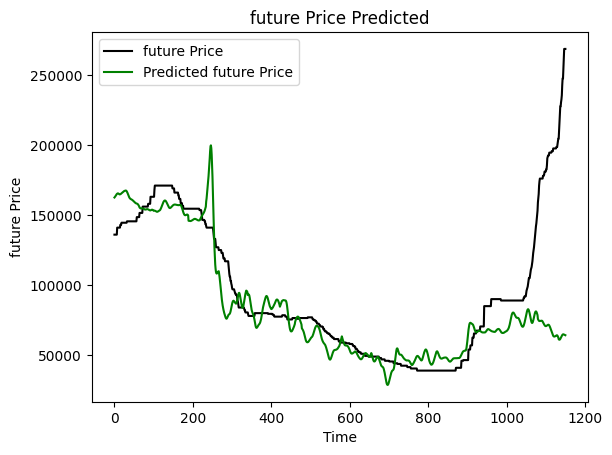

1555199000000.0


In [37]:
#simple unconv GNN approach
single = tf.keras.Sequential()
single.add(tf.keras.layers.Dense(16))
single.add(tf.keras.layers.Dense(1))

dense = tf.keras.Sequential()
dense.add(tf.keras.layers.Dense(128))
dense.add(Dropout(0.2))
dense.add(tf.keras.layers.Dense(16))
dense.add(Dropout(0.2))
dense.add(tf.keras.layers.Dense(1))

#fake data test--------------
#If there are some garbage stock datas, it is obvious that the GNN can not do the prediction
#Next step is the show that the GNN method is better than the ARIMA or something
#This time, should not use the Summed MSE on the whole dataset, there should be some other metrcis used to comapare
# num_days = len(y)
# num_features = 60
# np.random.seed(42)
# avg_daily_change = 0.001  # 0.1%
# std_daily_change = 0.015  # 1.5%
# predicted_embeddings = np.random.normal(avg_daily_change, std_daily_change, size=(num_days, num_features))
#-----------------------------

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(
  X[30:], y[30:], test_size=1 - 0.8, random_state=42, shuffle=False)

def propagate(X, adj):
  A = tf.reshape(single(adj), (len(adj),len(adj)))
  # A = tf.convert_to_tensor(np.eye(adj.shape[0]))
  deg = tf.reduce_sum(A, axis=-1) #dia matrix D
  XA = np.matmul(X, A/(deg+1))
  out = dense(XA) #what if we define as func(XAW)? like we initialize the (n,n) W matrix at first.
  return tf.reshape(out, (len(X),))

def calcLoss(preds, trues):
  mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
  l = mse(trues, preds)
  return l

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
for ep in np.arange(0, 100):
  with tf.GradientTape() as t:
    Y_pred = propagate(X_train, small_adj)
    loss = calcLoss(Y_pred, y_train)

  variables = t.watched_variables()
  grads = t.gradient(loss, variables)
  optimizer.apply_gradients(zip(grads, variables))

  preds = propagate(X_test, small_adj)
  # print(preds)
  test_acc = tf.keras.metrics.mean_squared_error(y_test, preds)
  print("mse on test:" + str(test_acc))
  # print(variables)

plt.plot(y, color = 'black', label = 'future Price')
plt.plot(propagate(X, small_adj), color = 'green', label = 'Predicted future Price')
plt.title('future Price Predicted')
plt.xlabel('Time')
plt.ylabel('future Price')
plt.legend()
plt.show()

print(np.sum((y[30:]-propagate(X[30:], small_adj))**2))

In [42]:
#eva on the whole set, sse
print(np.sum((y-propagate(X, small_adj))**2))
#with identical matrix as the adjacency matrix: 1841355600000.0
#so, its proved that actual adj works
(1995908722286 - 1572595800000)/1995908722286

1572595800000.0


0.21209032134553804

In [ ]:
# !pip install pyramid-arima

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:                          ARIMA   Log Likelihood                -382.864
Date:                Mon, 30 Oct 2023   AIC                            769.727
Time:                        20:49:41   BIC                            772.530
Sample:                             0   HQIC                           770.624
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.217e+05   1.37e+05      1.620      0.105   -4.65e+04     4.9e+05
sigma2      1.872e+10   7.07e+09      2.648      0.008    4.87e+09    3.26e+10
Ljung-Box (L1) (Q):                  27.75   Jarque-

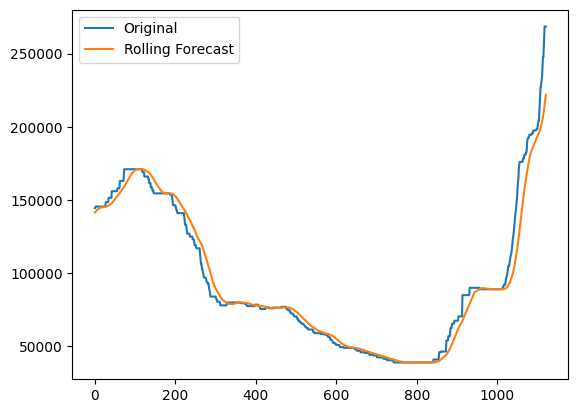

In [43]:
#ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

rolling_window = 30

forecasted_values = []
conf_intervals = []

trues = []
for i in np.arange(len(y) - rolling_window):
    # Extract the current rolling window
    rolling_y = y[i:i+rolling_window]
    trues.append(y[i+rolling_window])
    # Train ARIMA model on the rolling window data
    p = 10
    d = 0
    q = 1
    AR = ARIMA(rolling_y)
    fitted_model = AR.fit()
    # Forecast t+1 price using the trained model
    forecast = fitted_model.forecast(steps=1)
    # Append forecasted value and confidence interval to lists
    forecasted_values.append(forecast)

print(fitted_model.summary())
# Convert lists to NumPy arrays
forecasted_values = np.array(forecasted_values)

# Plot original data and rolling forecasts
assert len(trues) == len(forecasted_values)
plt.plot(trues, label='Original')
plt.plot(forecasted_values, label='Rolling Forecast')
# plt.fill_between(range(rolling_window - 1, len(y)),
#                  conf_intervals[:, 0], conf_intervals[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()


In [46]:
#eva on the whole set with length 1121
print(len(trues))
print(np.sum((forecasted_values - trues)**2))
# print(- (np.sum((y[30:]-propagate(X[30:], small_adj))**2) - np.sum((forecasted_values - trues)**2)))
#LSTM: 6030187345189175.0
#      4891445225162163.0
#ARIMA:5801896758931163.0
#GNN:     1398111200000.0
#Its been proved that the GNN method has the least MSE and SSE, compared to DNN and ARIMA
print((5801896703914505 - 1572595800000)/5801896703914505)

1121
5801896703914505.0
0.9997289514308417


In [ ]:
#vallina LSTM
def train_LSTM(y):
  y = np.array(y)
  ori_y = y
  sc = MinMaxScaler(feature_range=(0,1))
  y = sc.fit_transform(np.reshape(y, (len(y),1)))

  rolling_window = 30
  Xs = []
  forecasted_values = []
  ys = []
  for i in np.arange(len(y) - rolling_window):
    rolling_y = y[i:i+rolling_window]
    ys.append(y[i+rolling_window])
    Xs.append(rolling_y)
  assert len(Xs) == len(ys)
  Xs = np.array(Xs)
  ys = np.array(ys)
  print(Xs.shape, ys.shape)
  split_ratio = 0.8
  X_train, X_test, y_train, y_test = train_test_split(
    Xs, ys, test_size=1 - split_ratio, random_state=42, shuffle=True)

  X_train = tf.convert_to_tensor(X_train)
  X_test = tf.convert_to_tensor(X_test)
  y_train = tf.convert_to_tensor(y_train)
  y_test = tf.convert_to_tensor(y_test)
  model = Sequential()
  model.add(LSTM(1, input_shape=(rolling_window, 1), return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mean_squared_error')

  model.fit(X_train,y_train,epochs=10,batch_size=64, validation_data=(X_test,y_test))

  forecasted_values = sc.inverse_transform(np.array(model.predict(Xs)))
  print(len(forecasted_values))
  plt.plot(ori_y[rolling_window:], label='Original')
  plt.plot(forecasted_values, label='Rolling Forecast')
  plt.legend()
  plt.show()

  assert len(ori_y[rolling_window:]) == len(forecasted_values)
  print("sse:", np.sum((ori_y[rolling_window:]-forecasted_values)**2))
  print("mse:", np.mean((ori_y[rolling_window:]-forecasted_values)**2))

train_LSTM(y)


In [ ]:
# from sklearn.model_selection import train_test_split

# num_days = 100
# num_features = 93
# np.random.seed(42)
# # Generate random daily percent changes in stock prices
# # Assume an average daily percent change of 0.1% and a standard deviation of 1.5%
# avg_daily_change = 0.001  # 0.1%
# std_daily_change = 0.015  # 1.5%
# predicted_embeddings = np.random.normal(avg_daily_change, std_daily_change, size=(num_days, num_features))
# X_normalized = (predicted_embeddings - predicted_embeddings.mean(axis=0)) / predicted_embeddings.std(axis=0)
# print("Shape of X:", X_normalized.shape)

# # Generate random targets with an average price change of 0.2% and a standard deviation of 2.0%
# avg_price_change = 0.002  # 0.2%
# std_price_change = 0.020  # 2.0%
# Y = np.random.normal(avg_price_change, std_price_change, size=num_days)

# print("Shape of Y:", Y.shape)

# X_train, X_test, Y_train, Y_test = train_test_split(X_normalized.astype('float32'), Y.astype('float32'), test_size=0.3)
# print(type(Y_train))